<a href="https://colab.research.google.com/github/moseskigo/dsc-phase-1-project/blob/master/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#DSC Phase One Project

##Project Overview

For this project, we will use exploratory data analysis to generate insights for a business stakeholder.

## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they do not know anything about creating movies. We will explore what types of films are currently doing the best at the box office. The findings will be translated into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Background
Since the early 1900s, when specialized cinema theaters first appeared, motion pictures have been an integral part of contemporary culture. It is anticipated that box office receipts worldwide would rise rapidly in the upcoming years.
Making a movie is a difficult process with many steps and obstacles. The cost of production is high up front, and there is a significant wait before any returns appear. Consequently, making a movie is a dangerous endeavor because it is difficult to predict whether a film will be financially successful or not. This is particularly problematic for high-end films because there's a lot of money on the line.
There are five significant phases in the making of a movie:

• Development
This phase involves deciding on a movie concept, obtaining the required rights, writing the screenplay, and securing funding.
• Pre-production
Prior to filming, preparations are undertaken by recruiting the actors and crew, finding suitable locations for the shoot, and building the sets and props that will be needed.
• Production
the actual filming of the picture, during which extra sound and raw footage are recorded.
• Post-production
The finished output is created by editing recorded video and audio, adding graphic effects, and adding music.
• Distribution
The film is then promoted, released, and shown in theaters or on other media.

With Microsoft hoping to become a new player in the market, a few major studios are fighting for the interest of the public.

The increase of movie sequels, remakes, and adaptations in today's film industry, which are safer investments because they already have an established following, may be explained by the risk involved in making blockbusters. Aside from creating sequels, there are other alternative financial choices at the various stages of production.
Which genre of screenplay should have its rights purchased?

What age of filmgoers to target?

What time is the best to release the film?

In what way ought the film to be released?

This analysis aims to investigate how these kinds of decisions impact profitability.

## The Data
I have Used the three movie datasets below, The datasets contain movie ratings, genres, gross earnings, production years and number votes. In the folder zippedData are movie datasets from:

imdb.title.basics

imdb.title.ratings

bom.movie_gross

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import sqlite3
%matplotlib inline
import requests
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [21]:
#load the datasets
movie_gross = pd.read_csv('bom.movie_gross.csv')
title_basics = pd.read_csv('title.basics.csv', engine='python')
basic_title = pd.read_csv('title.basics.tsv', sep='\t')
imdb_ratings = pd.read_csv('title.ratings.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')
rt_movie = pd.read_csv('rt.movie_info.tsv', sep='\t')
movie_info = pd.read_csv('rt.movie_info.tsv', sep='\t')
rt_review = pd.read_csv('rt.reviews.tsv', sep='\t', encoding='latin-1')
tmdb_movies = pd.read_csv('tmdb.movies.csv', index_col='Unnamed: 0',)
genres_df = pd.read_csv('genres.csv')

In [24]:
#preview movie_gross dataset

'''
The movie_gross file contain information about movie gross earnings. Here are the columns and a brief description of each:

1. **title**: The title of the movie.
2. **studio**: The studio that produced the movie.
3. **domestic_gross**: The gross domestic earnings of the movie in USD.
4. **foreign_gross**: The gross foreign earnings of the movie. It seems like this might be a string, we may need to convert it to a numeric type for analysis.
5. **year**: The year the movie was released.
'''
# Show the first few rows of the DataFrame

movie_gross.head(2)

ValueError: ignored

In [ ]:
#preview title_basics dataset
title_basics.head()

In [ ]:
#preview imdb_ratings dataset
imdb_ratings.head()

In [22]:
#preview movie_budgets dataset
for column in ["production_budget", "domestic_gross", "worldwide_gross"]:
    movie_budgets[column] = movie_budgets[column].str.replace('$', '',regex=True).str.replace(',', '',regex=True).astype(int)


'''
The movie_budgets file contain information about movie budgets and earnings.

Here are the columns and a brief description of each:

1. **id**: An identifier for the movie.
2. **release_date**: The date the movie was released.
3. **movie**: The title of the movie.
4. **production_budget**: The budget for producing the movie.
5. **domestic_gross**: The gross domestic earnings of the movie in USD.
6. **worldwide_gross**: The gross worldwide earnings of the movie.

'''

movie_budgets['title'] = movie_budgets['movie']
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Star Wars Ep. VIII: The Last Jedi


In [14]:
for column in ["box_office"]:
    rt_movie[column] = rt_movie[column].str.replace('$', '',regex=True).str.replace(',', '',regex=True).astype(float)
rt_movie.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One


In [15]:
rt_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [16]:
'''
tmdb_movies Data Frame has;

1. **genre_ids** (Indexed by "Unnamed: 0"): A list of genre IDs associated with the movie.
2. **id**: An identifier for the movie.
3. **original_language**: The original language of the movie.
4. **original_title**: The original title of the movie.
5. **popularity**: A measure of the movie's popularity.
6. **release_date**: The date the movie was released.
7. **title**: The title of the movie.
8. **vote_average**: The average vote or rating for the movie.
9. **vote_count**: The number of votes the movie received.


'''

tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
# Create a dictionary mapping genre IDs to names
genre_dict = genres_df.set_index('id')['name'].to_dict()

# Define a function to map IDs to names
def map_ids_to_names(ids):
    return [genre_dict.get(id, id) for id in ids]

# Data Pre-Analysis and Cleanup

In [57]:
# Check for missing values in all dataframes
df_list=  [movie_gross,title_basics,basic_title,imdb_ratings,movie_budgets,rt_movie,movie_info,rt_review,tmdb_movies,genres_df]
df_list_names = ['movie_gross','title_basics','basic_title','imdb_ratings','movie_budgets','rt_movie','movie_info','rt_review','tmdb_movies','genres_df']
for i, n in zip(df_list, df_list_names):
    print(f'{n}:')
    print(i.isna().sum(), '\n ****************\n')

movie_gross:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64 
 ****************

title_basics:
tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64 
 ****************

basic_title:
tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            7
dtype: int64 
 ****************

imdb_ratings:
tconst           0
averagerating    0
numvotes         0
dtype: int64 
 ****************

movie_budgets:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
title                0
dtype: int64 
 ****************

rt_movie:
id               0
synopsis         0
rating           0
genre            0
director        41
writer          67
theater_date     6

In [56]:
# Summary of missing values

'''
movie_gross:
· studio: 5 missing values
· domestic_gross: 28 missing values
· foreign_gross: 1350 missing values
title_basics:
· original_title: 21 missing values
· runtime_minutes: 31739 missing values
· genres: 5408 missing values
basic_title:
· genres: 7 missing values
imdb_ratings:
· No missing values
movie_budgets:
· No missing values
rt_movie:
· synopsis: 62 missing values
· rating: 3 missing values
· genre: 8 missing values
· director: 199 missing values
· writer: 449 missing values
· theater_date: 359 missing values
· dvd_date: 359 missing values
· currency: 1220 missing values
· box_office: 1220 missing values
· runtime: 30 missing values
· studio: 1066 missing values
movie_info:
· synopsis: 62 missing values
· rating: 3 missing values
· genre: 8 missing values
· director: 199 missing values
· writer: 449 missing values
· theater_date: 359 missing values
· dvd_date: 359 missing values
· currency: 1220 missing values
· box_office: 1220 missing values
· runtime: 30 missing values
· studio: 1066 missing values
rt_review:
· review: 5563 missing values
· rating: 13517 missing values
· critic: 2722 missing values
· publisher: 309 missing values
tmdb_movies:
· No missing values
genres_df:
· No missing values
'''

'\nmovie_gross:\n· studio: 5 missing values\n· domestic_gross: 28 missing values\n· foreign_gross: 1350 missing values\ntitle_basics:\n· original_title: 21 missing values\n· runtime_minutes: 31739 missing values\n· genres: 5408 missing values\nbasic_title:\n· genres: 7 missing values\nimdb_ratings:\n· No missing values\nmovie_budgets:\n· No missing values\nrt_movie:\n· synopsis: 62 missing values\n· rating: 3 missing values\n· genre: 8 missing values\n· director: 199 missing values\n· writer: 449 missing values\n· theater_date: 359 missing values\n· dvd_date: 359 missing values\n· currency: 1220 missing values\n· box_office: 1220 missing values\n· runtime: 30 missing values\n· studio: 1066 missing values\nmovie_info:\n· synopsis: 62 missing values\n· rating: 3 missing values\n· genre: 8 missing values\n· director: 199 missing values\n· writer: 449 missing values\n· theater_date: 359 missing values\n· dvd_date: 359 missing values\n· currency: 1220 missing values\n· box_office: 1220 miss

In [ ]:
#summary of movie_gross dataframe
print(f'movie_gross has {movie_gross.shape[0]} rows and {movie_gross.shape[1]} columns')

movie_gross.info()

Assuming that the films associated with null values had no domestic gross income or foreign gross income within that year in order to manage the missing values in the domestic_gross and foreign_gross columns of movie_gross. And 0.00, will to be used to fill up the missing values of the two columns.
'Unknown' can be used to replace the five records in the studio column that have missing values.

In [26]:
#replace the missing values of foreign_gross and domestic_gross with 0.
movie_gross['domestic_gross'] = movie_gross.domestic_gross.fillna(0.0)
movie_gross['foreign_gross'] = movie_gross.foreign_gross.fillna(0.0)
#movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(",","",regex=True).apply(float)
#replace missing values of studio with 'Unknown'
movie_gross['studio'] = movie_gross.studio.fillna('Unknown')

In [32]:
# Drop rows with missing values in 'box_office' in rt_movie
rt_movie = rt_movie.dropna(subset=['box_office'])

# Drop rows with missing values in 'review' or 'rating' in rt_review
rt_review = rt_review.dropna(subset=['review', 'rating'])

We need to convert the `foreign_gross` column in `movie_gross`, the `box_office` and `runtime` columns in `rt_movie`, and the `release_date` columns in `rt_movie`, `tmdb_movies`, and `movie_budgets` to the appropriate data types. Let's proceed with these conversions.

In [79]:
# Convert 'box_office' and 'runtime' in rt_movie to numeric types
rt_movie['box_office'] = rt_movie['box_office'].str.replace('$', '').str.replace(',', '').astype(float)
rt_movie['runtime'] = rt_movie['runtime'].str.replace(' minutes', '').astype(float)

# Convert 'release_date' in rt_movie, tmdb_movies, and movie_budgets to datetime
rt_movie['theater_date'] = pd.to_datetime(rt_movie['theater_date'], errors='coerce')
rt_movie['dvd_date'] = pd.to_datetime(rt_movie['dvd_date'], errors='coerce')
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'], errors='coerce')

# Check data types again
data_types_after = {
    "movie_gross": movie_gross.dtypes,
    "rt_movie": rt_movie.dtypes,
    "tmdb_movies": tmdb_movies.dtypes,
    "movie_budgets": movie_budgets.dtypes
}

data_types_after

<ipython-input-79-527e1cbcef84>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rt_movie['box_office'] = rt_movie['box_office'].str.replace('$', '').str.replace(',', '').astype(float)


ValueError: ignored

In [27]:
#replace missing values in the original_title column with the primary title
title_basics['original_title'] = title_basics['original_title'].fillna(title_basics['primary_title'])

#Checking for the median runtime
title_basics['runtime_minutes'].median()

# replace  missing values of the runtime_minutes with the median value
title_basics['runtime_minutes'] = title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].median())

#drop the missing values in the genres column
title_basics = title_basics.dropna(subset=['genres'])

In [58]:
#Summary of the title_basics DataFrame

print(f'title_basics has {title_basics.shape[0]} rows and {title_basics.shape[1]} columns')
title_basics.info()

title_basics has 140736 rows and 6 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   original_title   140736 non-null  object 
 3   start_year       140736 non-null  int64  
 4   runtime_minutes  140736 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [ ]:
#Check the number of missing values in the title_basics Data Frame
title_basics.isna().sum()

In [ ]:
#Check if there are any duplicate rows in the title_basics DF
title_duplicate = len(title_basics)-len(title_basics.drop_duplicates())
print(title_duplicate)

In [46]:
title_basics.head(15)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,87.0,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [47]:
#summary of the imdb_ratings dataframe
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
#summary statistics of imdb_ratings
imdb_ratings.describe()

In [81]:
# Drop rows with missing values in 'domestic_gross' or 'foreign_gross' in df
movie_gross = movie_gross.dropna(subset=['domestic_gross', 'foreign_gross'])

# Drop rows with missing values in 'box_office' in rt_movie
rt_movie = rt_movie.dropna(subset=['box_office'])

# Drop rows with missing values in 'review' or 'rating' in df3
rt_review = rt_review.dropna(subset=['review', 'rating'])

# Check for missing values again
missing_values_after = {
    "movie_gross": movie_gross.isnull().sum(),
    "rt_movie": rt_movie.isnull().sum(),
    "rt_review": rt_review.isnull().sum()
}

missing_values_after

{'movie_gross': title             0
 studio            0
 domestic_gross    0
 foreign_gross     0
 year              0
 dtype: int64,
 'rt_movie': id              0
 synopsis        0
 rating          0
 genre           0
 director        0
 writer          0
 theater_date    0
 dvd_date        0
 currency        0
 box_office      0
 runtime         0
 studio          0
 dtype: int64,
 'rt_review': id            0
 review        0
 rating        0
 fresh         0
 critic        0
 top_critic    0
 publisher     0
 date          0
 dtype: int64}

In [62]:
#Replace rt_movies and rt_review missing values with Unknown

rt_movie = rt_movie.fillna('Unknown')
rt_review= rt_review.fillna('Unknown')

In [63]:
rt_movie.isnull().sum()
rt_review.isnull().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

## Check for Duplicates

In [48]:
#display all duplicate records for movie gross 'title' column
movie_gross[movie_gross.duplicated(keep=False, subset='title')].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200.0,2010
3045,Bluebeard,WGUSA,43100.0,0.0,2017


The two records above, with the same title 'Bluebeard', are not duplicate records because the other columns in the dataset, other than the title, have different values, they are removed so as not to cause problems down the road.

In [49]:
movie_gross.drop_duplicates(subset=['title'])

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


In [50]:
imdb_ratings[imdb_ratings.duplicated(keep=False, subset=['tconst'])].sort_values(by='tconst')

,tconst,averagerating,numvotes


imdb_ratings dataframe has no duplicate records.

In [51]:
#display all duplicate records for title_basics dataframe using 'primaryTitle','startYear' and 'genres' columns
title_basics[title_basics.duplicated(keep=False, subset=['primary_title','start_year', 'genres'])].sort_values(by='primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
129962,tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography
145118,tt9773302,3. Elma,3. Elma,2014,65.0,Drama
144392,tt9660588,3. Elma,3. Elma,2014,65.0,Drama
144337,tt9653930,3. Elma,3. Elma,2014,65.0,Drama
...,...,...,...,...,...,...
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66989,tt3815122,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66994,tt3815132,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"



title_basics has duplicate records based on the primaryTitle and the startYear. Some of the duplicate records have slightly different genres while others have missing values in either the runtimeMinutes or genre columns.
The duplicate records will be dropped, while keeping the entry with the least number of missing values.

In [52]:
#assign a different variable name to a copy of the title_basics dataframe
title_df = title_basics.copy()

#assign a new column, 'missing', to the sum of missing values in each row
#sort the dataframe by values of the 'primary_title' and 'missing'
title_df = title_df.assign(missing=title_df.isnull().sum(axis=1)).sort_values(by=['primary_title', 'missing'], ascending=True)

# preview of duplicated records
title_df[title_df.duplicated(keep=False, subset=['primary_title','start_year'])][19:29]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,missing
59640,tt3463230,37,37,2018,90.0,Drama,0
99507,tt5815216,37,37,2018,87.0,"Drama,Romance,Thriller",0
30089,tt2148554,41,41,2012,98.0,Documentary,0
35991,tt2319739,41,41,2012,80.0,"Drama,Sci-Fi",0
142077,tt9331072,44 Days,44 Days,2018,52.0,Mystery,0
143987,tt9614898,44 Days,44 Days,2018,76.0,"Drama,War",0
51820,tt3072686,5 People,5 People,2013,87.0,Thriller,0
55539,tt3252324,5 People,5 People,2013,87.0,"Comedy,Drama,Thriller",0
46602,tt2771990,7 Days,7 Days,2015,87.0,Sci-Fi,0
88065,tt5112592,7 Days,Nanoka,2015,110.0,Drama,0


In [53]:
#drop duplicates while keeping the entry with least missing values and drop the column 'missing'
title_df = title_df.drop_duplicates(keep='first', subset=['primary_title','start_year']).drop(columns='missing')

In [54]:
##recheck for duplicates
title_df[title_df.duplicated(keep=False, subset=['primary_title','start_year'])].sort_values(by=['primary_title','start_year'])

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [55]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138926 entries, 13871 to 76481
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           138926 non-null  object 
 1   primary_title    138926 non-null  object 
 2   original_title   138926 non-null  object 
 3   start_year       138926 non-null  int64  
 4   runtime_minutes  138926 non-null  float64
 5   genres           138926 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.4+ MB


In [65]:
# Check for duplicates in all dataframes and drop them
duplicates = {
    "movie_gross": movie_gross.duplicated().sum(),
    "rt_movie": rt_movie.duplicated().sum(),
    "rt_review": rt_review.duplicated().sum(),
    "tmdb_movies": tmdb_movies.duplicated().sum(),
    "movie_budgets": movie_budgets.duplicated().sum()
}

# Drop duplicates
movie_gross = movie_gross.drop_duplicates()
rt_movie = rt_movie.drop_duplicates()
rt_review = rt_review.drop_duplicates()
tmdb_movies = tmdb_movies.drop_duplicates()
movie_budgets = movie_budgets.drop_duplicates()

duplicates

{'movie_gross': 0,
 'rt_movie': 0,
 'rt_review': 0,
 'tmdb_movies': 0,
 'movie_budgets': 0}

## Checking for wrong Data Types

In [ ]:
#check the data type of each column
print(f'movie_gross data types: \n {movie_gross.dtypes} \n **********************')
print(f'\n title_df data types: \n {title_df.dtypes} \n **********************')
print(f'\n imdb_ratings data types: \n {imdb_ratings.dtypes} \n **********************')
print(f'\n movie_budgets data types: \n {movie_budgets.dtypes} \n **********************')

In [ ]:
movie_gross.info()

Check for missing values

In [ ]:
#check for missing values
df_list=  [movie_gross,title_df,imdb_ratings]
df_list_names = ['movie_gross','title_df','imdb_ratings']
for i, n in zip(df_list, df_list_names):
    print(f'{n}:')
    print(i.isna().sum(), '\n ****************\n')

## Merging Data Frames

### Import studio from movies_gross to movie_budgets since movies_budgets has more information including production budget and worldwide gross

In [87]:
#Merge the title_df with the imdb_ratings DataFrames an inner join
joined_imdb_df = title_df.merge(imdb_ratings, on='tconst', how='inner')
joined_imdb_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1699720,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,6.9,196
1,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,5.6,40
2,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",6.8,6


In [88]:
joined_imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           72300 non-null  object 
 1   primary_title    72300 non-null  object 
 2   original_title   72300 non-null  object 
 3   start_year       72300 non-null  int64  
 4   runtime_minutes  72300 non-null  float64
 5   genres           72300 non-null  object 
 6   averagerating    72300 non-null  float64
 7   numvotes         72300 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


The joined_imdb_df dataframe has two columns for the movie title: primaryTitle and the originalTitle
It is important to determine the column to use for merging the movie_gross_df and joined_imdb_df dataframes.
From the IMDB Datasets website:

primary_title is the more popular title / the title used by the filmmakers on promotional materials at the point of release.
original_title is the original title, in the original language
In this case, since primary_title is the more popular title, it will be used to merge the two datasets.

In [89]:
#Rename primary_title column to movie
joined_imdb_df.rename(columns = {'primary_title': 'title'}, inplace = True)
#Merge movie_gross and joined_imdb_df on the movie column using an inner join
movies_df = joined_imdb_df.merge(movie_gross, on='title', how='inner')
movies_df.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt2614684,'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,0.0,2014
2,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016
3,tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,0.0,2012
4,tt3346824,1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,0.0,2015


In [90]:
#Check joined_imdb_df for duplicates in primaryTitle column
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2948 entries, 0 to 2947
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2948 non-null   object 
 1   title            2948 non-null   object 
 2   original_title   2948 non-null   object 
 3   start_year       2948 non-null   int64  
 4   runtime_minutes  2948 non-null   float64
 5   genres           2948 non-null   object 
 6   averagerating    2948 non-null   float64
 7   numvotes         2948 non-null   int64  
 8   studio           2948 non-null   object 
 9   domestic_gross   2948 non-null   float64
 10  foreign_gross    2948 non-null   float64
 11  year             2948 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 299.4+ KB


In [91]:
#shape of merged dataframe
movies_df.shape

(2948, 12)

In [92]:
#check for duplicates in merged dataframe
movies_df.duplicated().value_counts()

False    2948
dtype: int64

In [93]:
##unique value counts in columns with dtype object in the merged dataset
cat_columns = movies_df.select_dtypes(include='object').columns
for column in cat_columns:
    print(f'{column}:')
    print(movies_df[column].value_counts())
    print()

tconst:
tt6599340    2
tt2442772    2
tt2614684    1
tt1464580    1
tt2250912    1
            ..
tt5220122    1
tt1573072    1
tt4991978    1
tt1980986    1
tt2948356    1
Name: tconst, Length: 2946, dtype: int64

title:
One Day                         6
Gold                            6
Youth                           5
We Are Family                   5
Mama                            4
                               ..
I Can Speak                     1
I Don't Know How She Does It    1
I Feel Pretty                   1
I Give It a Year                1
Zootopia                        1
Name: title, Length: 2598, dtype: int64

original_title:
The Journey             4
Mama                    4
Aurora                  4
The Gambler             4
Eden                    4
                       ..
Ang-ma-reul bo-at-da    1
I Saw the Light         1
I Smile Back            1
I Spit on Your Grave    1
Zootopia                1
Name: original_title, Length: 2704, dtype: int64

genres:
Dra

In [94]:
#make a copy of the dataframe and assign it to a different variable name.
movies = movies_df.copy()
#split the genre categories into a list, around the comma separator
movies['genres'] = movies['genres'].str.split(',')
#transform each element in the genres list to a row
movies = movies.explode('genres')

In [95]:
#reset index
movies = movies.reset_index(drop=True)

In [96]:
#value counts of the genres column in the new dataset after separating the genres
movies['genres'].value_counts()

Drama          1718
Comedy          918
Action          638
Romance         464
Thriller        439
Adventure       436
Crime           379
Biography       282
Horror          230
Documentary     216
Mystery         206
Fantasy         166
Animation       151
Sci-Fi          135
History         134
Family          114
Music            89
Sport            52
War              50
Western          21
Musical          18
News              2
Name: genres, dtype: int64

In [97]:
#value counts of the genres column in the dataset before separating the genres
movies_df['genres'].value_counts()

Drama                      296
Comedy,Drama,Romance       131
Comedy,Drama               131
Drama,Romance              111
Documentary                104
                          ... 
Drama,History,Sport          1
Action,Animation,Sci-Fi      1
Adventure,Comedy,Music       1
Adventure,Drama,Sport        1
Sport                        1
Name: genres, Length: 320, dtype: int64

In [69]:
import ast
# Merge the result with movie_budgets based on the 'id' column
merged_df = pd.merge(tmdb_movies, movie_gross, on='title')
final_merged_df = pd.merge(merged_df, movie_budgets, on='title')

# # Drop the duplicate columns
final_merged_df.drop(columns=['release_date_x', 'domestic_gross_y', 'id_x', 'original_title','id_y', 'movie'], inplace=True)

# Rename the 'movie' column to 'title'
final_merged_df.rename(columns={'domestic_gross_x': 'domestic_gross'}, inplace=True)
final_merged_df.rename(columns={'release_date_y': 'release_date'}, inplace=True)

# Convert the string representation of lists into actual lists of integers
final_merged_df['genre_ids'] = final_merged_df['genre_ids'].apply(ast.literal_eval)

# Create a new column 'genre_names' that maps the genre IDs to their names
final_merged_df['genre_names'] = final_merged_df['genre_ids'].apply(map_ids_to_names)


# Save DataFrame to CSV
final_merged_df.to_csv('final_merged_df.csv', index=False)

final_merged_df.head()

,genre_ids,original_language,popularity,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,genre_names
0,"[14, 12, 16, 10751]",en,28.734,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010,2010-03-26,165000000,494870992,"[Fantasy, Adventure, Animation, Family]"
1,"[12, 28, 878]",en,28.515,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010,2010-05-07,170000000,621156389,"[Adventure, Action, Science Fiction]"
2,"[28, 878, 12]",en,27.920,Inception,8.3,22186,WB,292600000.0,535700000.0,2010,2010-07-16,160000000,835524642,"[Action, Science Fiction, Adventure]"
3,"[16, 10751, 35]",en,24.445,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010,2010-06-18,200000000,1068879522,"[Animation, Family, Comedy]"
4,"[16, 10751, 35]",en,23.673,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010,2010-07-09,69000000,543464573,"[Animation, Family, Comedy]"


# Data Modelling

## Popular Genre Combinations

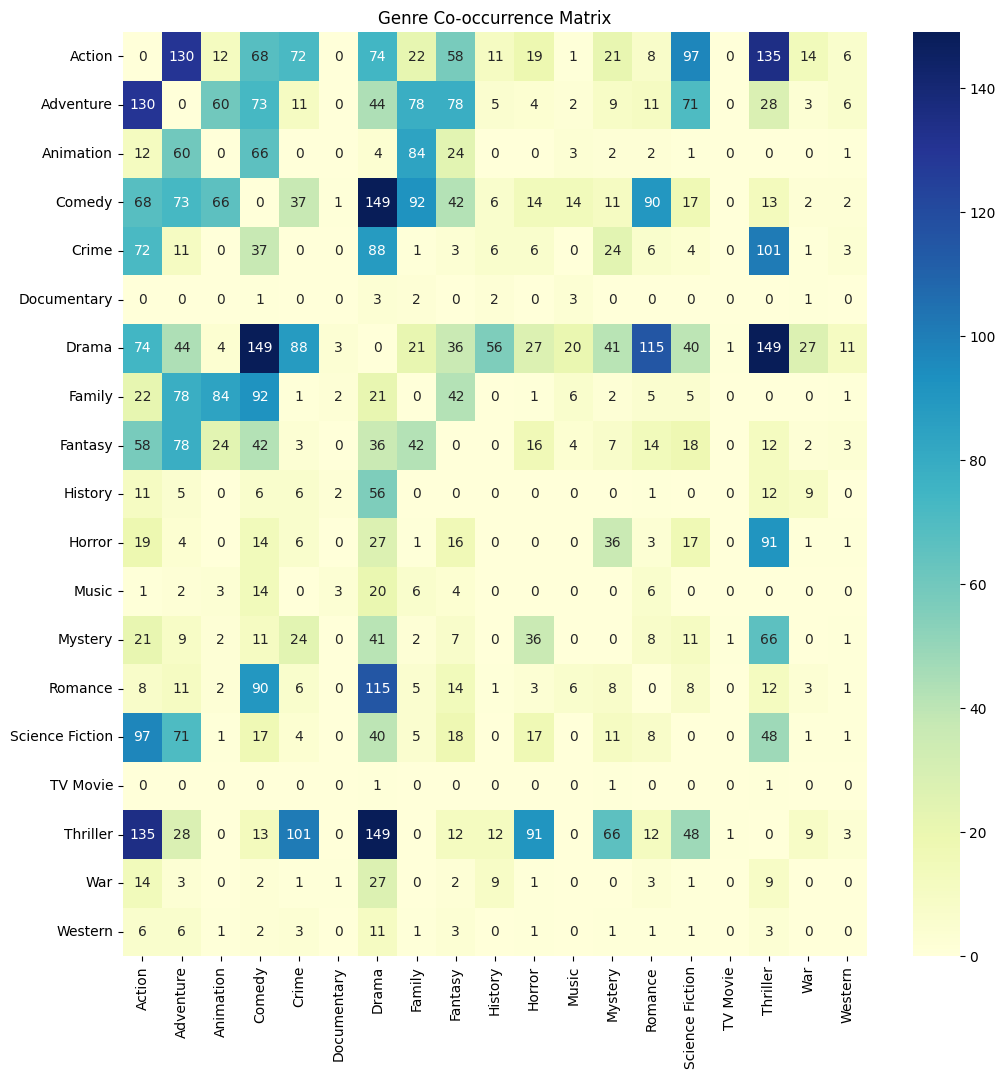

In [70]:
# Import necessary libraries
from ast import literal_eval

from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Binarize the genre labels
binary_genres = mlb.fit_transform(final_merged_df['genre_names'])

# Create a DataFrame from the binary labels
binary_genres_df = pd.DataFrame(binary_genres, columns=mlb.classes_)

# Compute the co-occurrence matrix
co_occurrence_matrix = binary_genres_df.T.dot(binary_genres_df)

# Set the diagonal to zero, since we're not interested in how often each genre co-occurs with itself
np.fill_diagonal(co_occurrence_matrix.values, 0)

# Display the co-occurrence matrix
plt.figure(figsize=(12, 12))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Genre Co-occurrence Matrix')
plt.show()

The heatmap above is a genre co-occurrence matrix, which shows how often each pair of genres appears together in the same movie. The color of each cell represents the number of times the corresponding genres co-occur, with darker colors indicating higher co-occurrence.

From the heatmap, we can observe that certain genres tend to co-occur more frequently. For example, 'Adventure' and 'Action', 'Adventure' and 'Fantasy', 'Adventure' and 'Science Fiction' are some pairs of genres that often appear together.

---

## Most Popular Genres

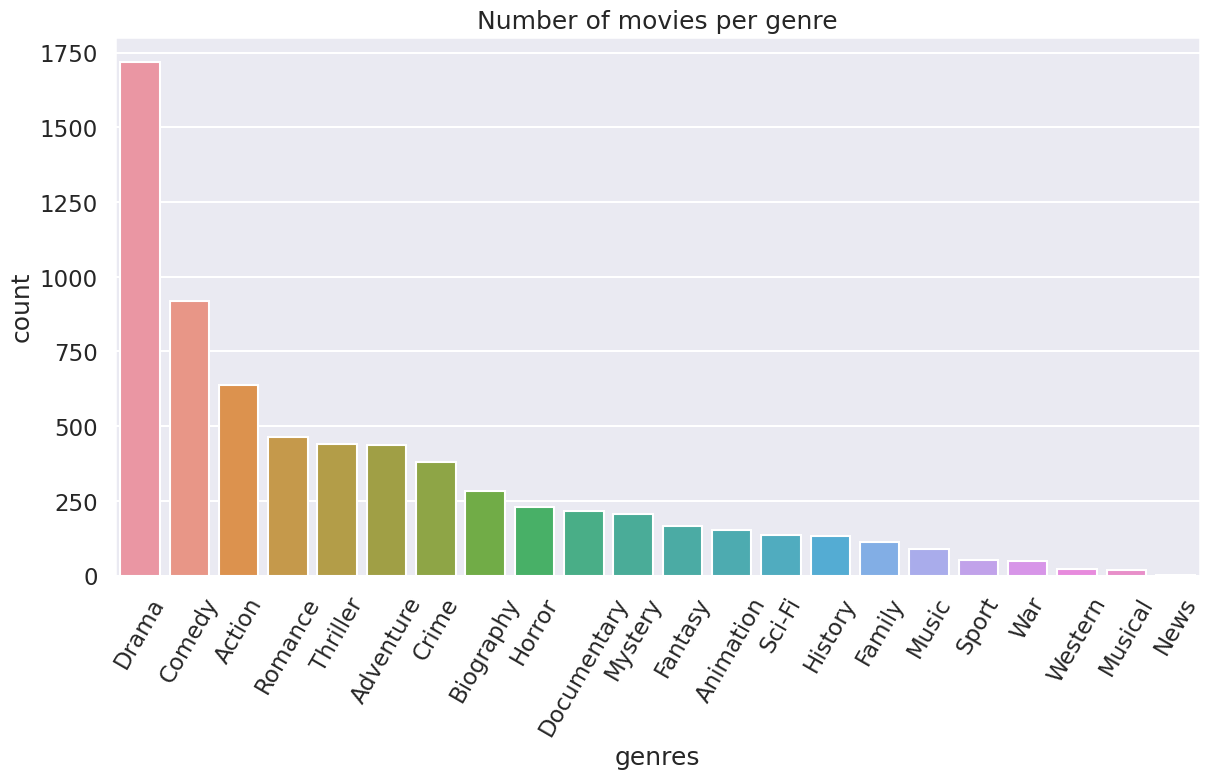

In [98]:
#countplot showing the number of movies per genre
sns.set(style='darkgrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.countplot(x=movies['genres'], order=movies['genres'].value_counts().index)
ax.set_title('Number of movies per genre')
ax.set_xlabel('genres')
plt.xticks(rotation=60);

Release period vs worldwide gross

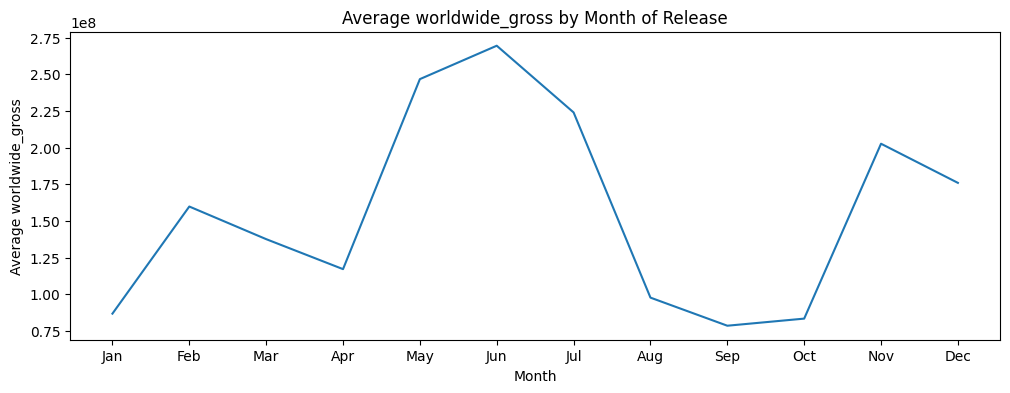

In [71]:
# Convert 'release_date' to datetime
final_merged_df['release_date'] = pd.to_datetime(final_merged_df['release_date'])

# Extract the month from the release date
final_merged_df['release_month'] = final_merged_df['release_date'].dt.month

# Compute the average profit per month
profit_per_month = final_merged_df.groupby('release_month')['worldwide_gross'].mean()

# Plot the average profit per month
plt.figure(figsize=(12, 4))
sns.lineplot(x=profit_per_month.index, y=profit_per_month.values)
plt.xlabel('Month')
plt.ylabel('Average worldwide_gross')
plt.title('Average worldwide_gross by Month of Release')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Movies released in the months of May, June, and July tend to yield higher profits, which coincides with long summer holidays for the northern hemisphere. There is also a noticeable peak in November due to the winter holiday season.
***

In [100]:
# Calculate the average worldwide_gross per year
average_worldwide_gross_per_year = final_merged_df.groupby('year')['worldwide_gross'].mean().reset_index().astype(int)
print(average_worldwide_gross_per_year)

   year  worldwide_gross
0  2010        117143016
1  2011        117908208
2  2012        146937433
3  2013        169846562
4  2014        161539328
5  2015        147218496
6  2016        165170563
7  2017        204332684
8  2018        218175923


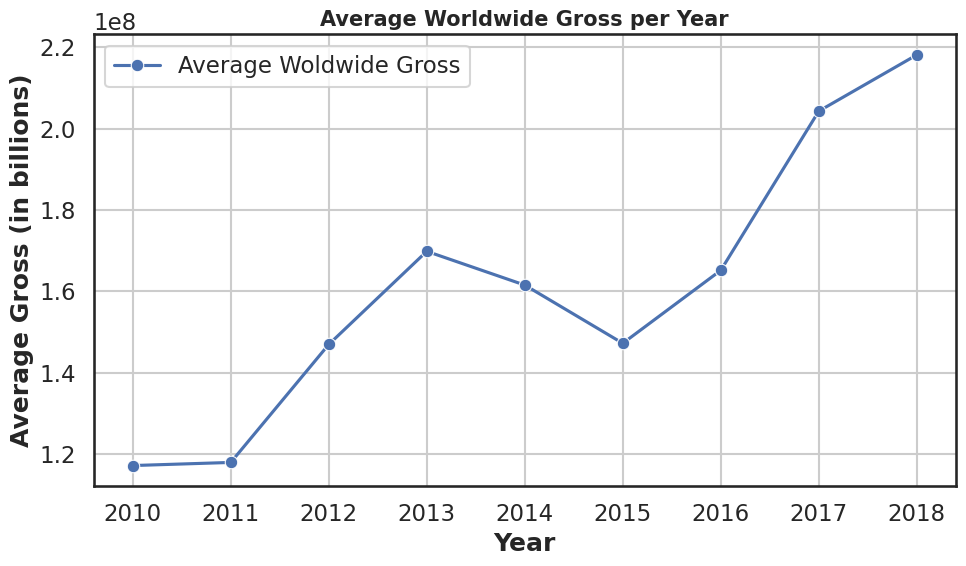

In [101]:
# Plot average domestic_gross, foreign_gross and worldwide_gross per year
plt.figure(figsize=(10, 6))
sns.set_style("white")
sns.lineplot(x='year', y='worldwide_gross', data=average_worldwide_gross_per_year, marker='o', label='Average Woldwide Gross')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Gross (in billions)', fontweight='bold')
plt.title('Average Worldwide Gross per Year', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.show()

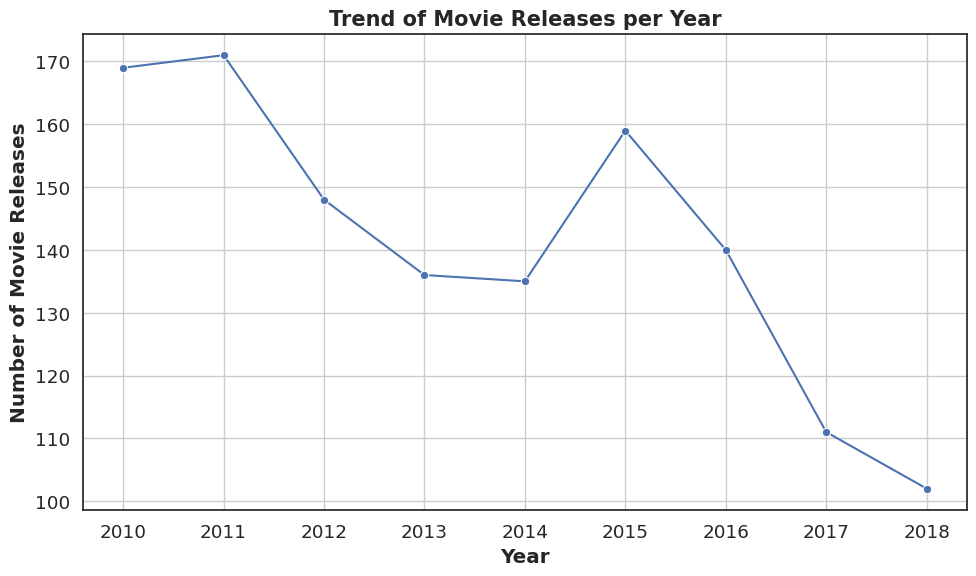

In [112]:
# Group the data by 'season' and 'year', and count the number of movie releases for each combination
movie_releases_per_year = final_merged_df.groupby('year').size().reset_index(name='count')

# Create the line plot
sns.set(font_scale=1.2)
sns.set_style('white')
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='count', data=movie_releases_per_year, marker='o')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Movie Releases', fontweight='bold')
plt.title('Trend of Movie Releases per Year', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.grid(True)

plt.show()

## Return on Investment

This will analyze if there is a relationship between the production budget and the worldwide gross. The analysis will be limited since there are more costs involved in the process after production such as the marketing budget, and residuals which are yments are calculated on the basis of sales performance using rules that are set out in industry negotiated agreements.

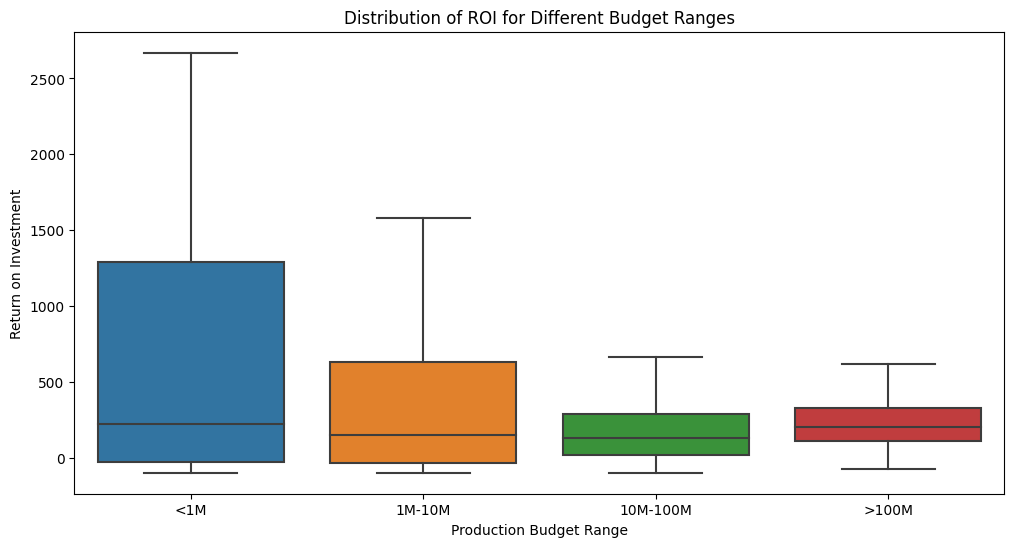

In [75]:
# Calculate ROI
final_merged_df['ROI'] = ((final_merged_df['worldwide_gross'] - final_merged_df['production_budget']) / final_merged_df['production_budget']) * 100

# Compute the correlation
correlation = final_merged_df[['production_budget', 'ROI']].corr()

# Create budget categories
bins = [0, 1e6, 1e7, 1e8, np.inf]
names = ['<1M', '1M-10M', '10M-100M', '>100M']

final_merged_df['Budget_Range'] = pd.cut(final_merged_df['production_budget'], bins, labels=names)

# Create a boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Budget_Range', y='ROI', data=final_merged_df, order=names, showfliers=False)

plt.title('Distribution of ROI for Different Budget Ranges')
plt.xlabel('Production Budget Range')
plt.ylabel('Return on Investment')

plt.show()

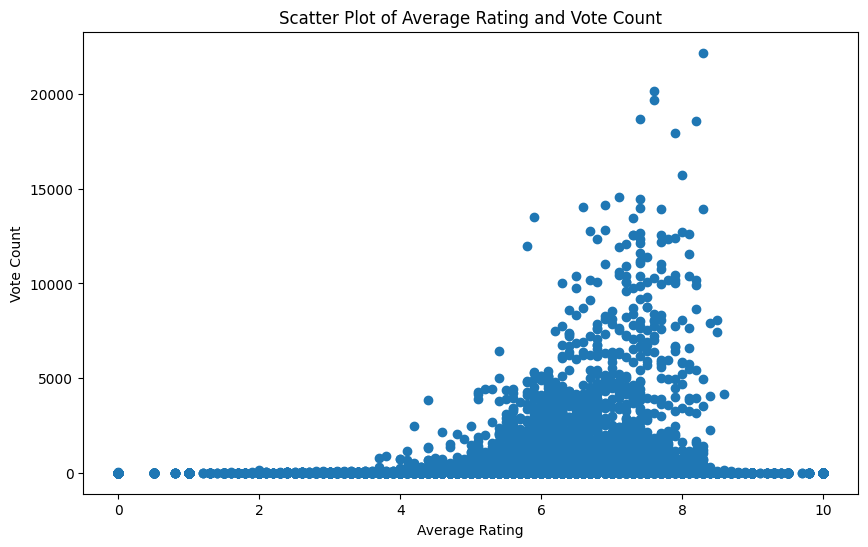

In [73]:
# Scatter plot of average rating in tmdb_movies
plt.figure(figsize=(10, 6))
plt.scatter(tmdb_movies['vote_average'], tmdb_movies['vote_count'])
plt.xlabel('Average Rating')
plt.ylabel('Vote Count')
plt.title('Scatter Plot of Average Rating and Vote Count')
plt.show()

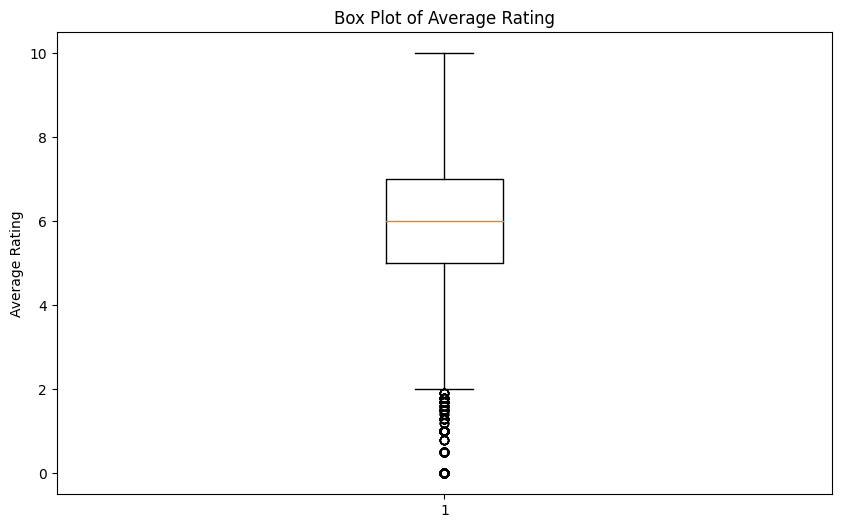

In [77]:
# Box plot of average rating in tmdb_movies
plt.figure(figsize=(10, 6))
plt.boxplot(tmdb_movies['vote_average'].dropna())
plt.ylabel('Average Rating')
plt.title('Box Plot of Average Rating')
plt.show()

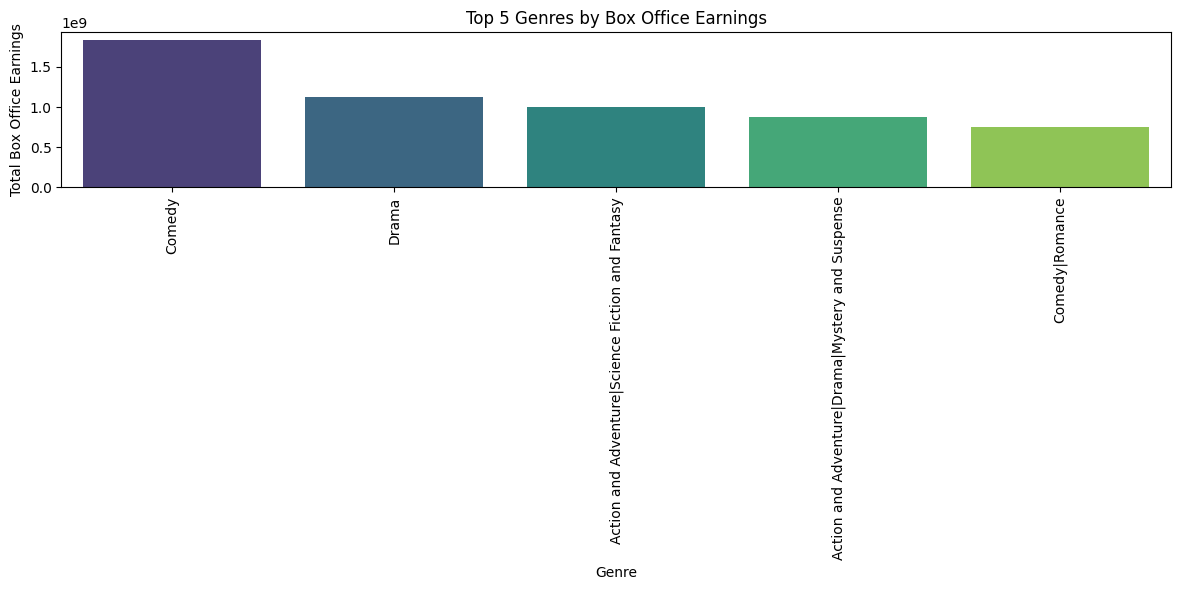

In [85]:
#Explode the "genre" column to create a new row for each genre of a movie
rt_movie_exploded = rt_movie.explode('genre')

# Group the data by genre and calculate the sum of box office earnings for each genre
genre_box_office = rt_movie_exploded.groupby('genre')['box_office'].sum().sort_values(ascending=False)

# Select the top 5 genres
top_5_genres = genre_box_office.head(5)

# Plot the top 5 genres with colors using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_genres.index, y=top_5_genres.values, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Total Box Office Earnings')
plt.title('Top 5 Genres by Box Office Earnings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [114]:
# # Display the highest earning movies per year

# Find the index of the row with the highest gross earnings for each year
max_gross_movies_indices = final_merged_df.groupby('year')['worldwide_gross'].idxmax()
# Select the rows corresponding to the highest earning movies for each year
highest_gross_movies = final_merged_df.loc[max_gross_movies_indices]

highest_gross_movies[['year', 'title', 'worldwide_gross']].sort_values(by='worldwide_gross', ascending=False)

,year,title,worldwide_gross
1191,2018,Avengers: Infinity War,2048134200
843,2015,Jurassic World,1648854864
90,2013,Frozen,1272469910
1105,2017,The Fate of the Furious,1234846267
971,2016,Captain America: Civil War,1140069413
357,2011,Transformers: Dark of the Moon,1123790543
403,2012,Skyfall,1110526981
715,2014,Transformers: Age of Extinction,1104039076
3,2010,Toy Story 3,1068879522


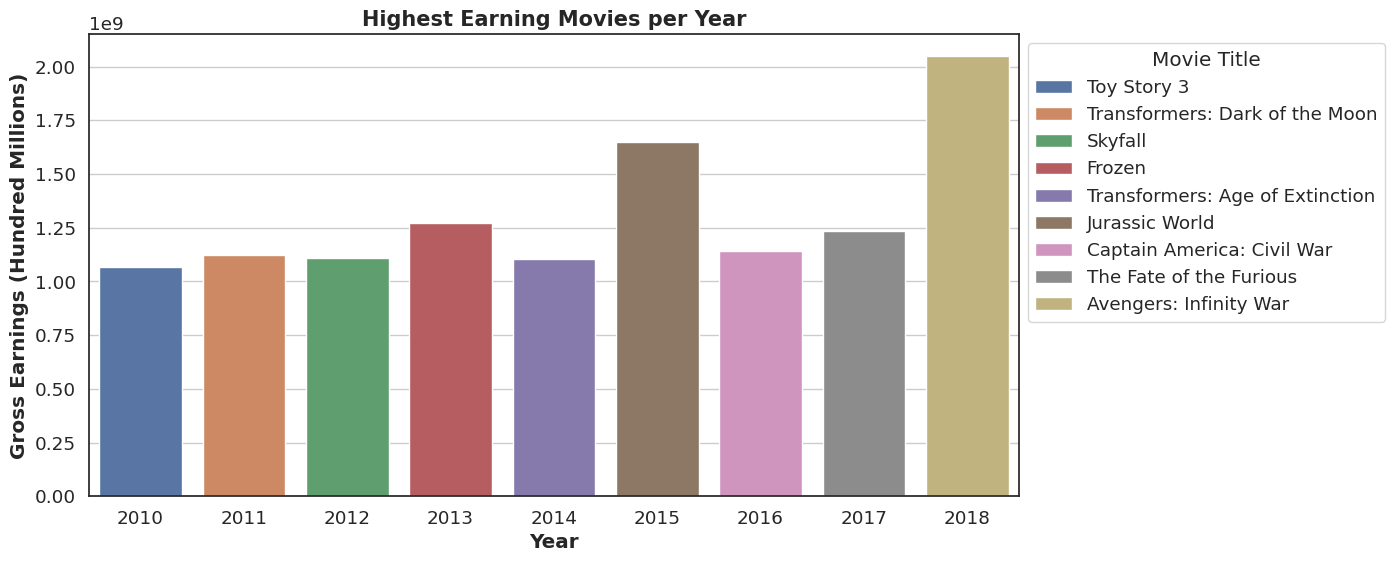

In [115]:
# Plot the highest earning movies per year
plt.figure(figsize=(12, 6))
sns.set_style('white')
sns.barplot(data=highest_gross_movies, x='year', y='worldwide_gross', hue='title', dodge=False)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Gross Earnings (Hundred Millions)', fontweight='bold')
plt.title('Highest Earning Movies per Year', fontsize=15, fontweight='bold')
plt.grid(axis='y')
plt.legend(title='Movie Title', bbox_to_anchor=(1, 1))

plt.show()

In [116]:
# Create a new column 'gross_profit' which is the difference between worldwide_gross and production_budget
final_merged_df['gross_profit']= final_merged_df['worldwide_gross'] - final_merged_df['production_budget']

In [118]:
# Display movies with the highest gross profit per year

# Find the index of the row with the highest domestic gross earnings for each year
max_grossprofit_movies_indices = final_merged_df.groupby('year')['gross_profit'].idxmax()

# Select the rows corresponding to the highest earning movies for each year
highest_grossprofit_movies = final_merged_df.loc[max_grossprofit_movies_indices]

highest_grossprofit_movies[['year', 'title', 'gross_profit', 'studio']].sort_values(ascending=False, by='gross_profit')

,year,title,gross_profit,studio
1191,2018,Avengers: Infinity War,1748134200,BV
843,2015,Jurassic World,1433854864,Uni.
90,2013,Frozen,1122469910,BV
1105,2017,The Fate of the Furious,984846267,Uni.
357,2011,Transformers: Dark of the Moon,928790543,P/DW
403,2012,Skyfall,910526981,Sony
715,2014,Transformers: Age of Extinction,894039076,Par.
971,2016,Captain America: Civil War,890069413,BV
3,2010,Toy Story 3,868879522,BV


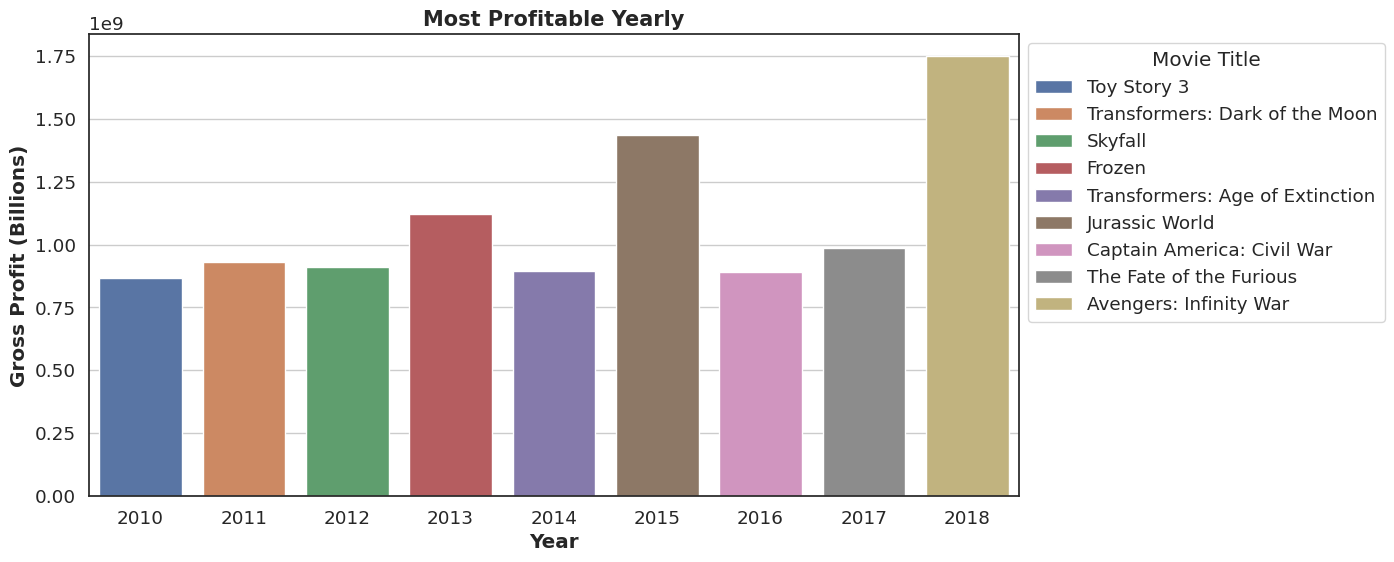

In [120]:
# Plot the movies with the highest gross profit per year
plt.figure(figsize=(12, 6))
sns.set_style('white')
sns.barplot(data=highest_grossprofit_movies, x='year', y='gross_profit', hue='title', dodge=False)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Gross Profit (Billions)', fontweight='bold')
plt.title('Most Profitable Yearly', fontsize=15, fontweight='bold')
plt.grid(axis='y')
plt.legend(title='Movie Title', bbox_to_anchor=(1, 1))

plt.show()

## Studios: Top 20 Releases Over the Years

We look at the number of movie releases per studio for each year and find that Buena Vista/Walt Disney, Paramount, Universal Studios, Warner Brothers, and Fox are consistently been among the highest number of movie producers over the 8-year period.

In [121]:
# Display number of movies per studio each year
movies_per_studio_per_year = final_merged_df.groupby(['studio', 'year']).size()\
                .reset_index(name='count').sort_values(by='count', ascending=False)
movies_per_studio_per_year

,studio,year,count
245,Uni.,2015,25
240,Uni.,2010,19
248,Uni.,2018,15
79,Fox,2015,15
247,Uni.,2017,15
...,...,...,...
110,Jan.,2011,1
109,IW,2010,1
108,IM,2012,1
99,GrtIndia,2017,1


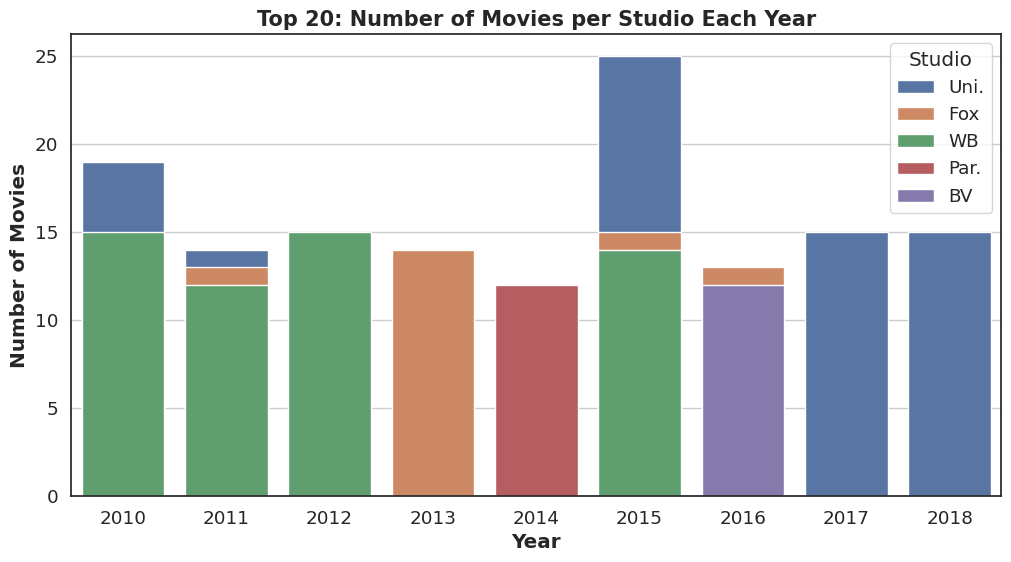

In [122]:
# Plot the top 20 number of movies per studio each year
plt.figure(figsize=(12, 6))
sns.set_style('white')
sns.barplot(x='year', y='count', hue='studio', data=movies_per_studio_per_year.head(20), dodge=False)
plt.title('Top 20: Number of Movies per Studio Each Year', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Movies', fontweight='bold')
plt.grid(axis='y')
plt.legend(title='Studio', loc='upper right')

plt.show()

## Studios: Highest Earning Per Year

Looking at the highest earners year on year, domestically Walt Disney (BV) and Warner Bros. (WB) appear to have been the most successful with their releases making them the highest earners in 3 out of the 9 years.

Overseas Walt Disney has had even more success with their productions as they have been the highest earning studio for 5 out of the 9 years. Also successful with their production in the foreign market is Universal, being the highest earner in 2 different years.

Looking at global earnings in totality, the data infers that Walt Disney is the most successful production studio between 2010 and 2018 having been the highest earner in 3 different years, followed thereon by Universal Studios.


In [129]:
# Find the studio with the highest domestic_gross earnings each year
# Group by 'year' and find the index of the maximum domestic gross earnings for each year
max_dom_studio_indices = final_merged_df.groupby('year')['domestic_gross'].idxmax()

# Select the studios with the highest domestic gross earnings for each year
studio_dom_earnings_per_year = final_merged_df.loc[max_dom_studio_indices, ['year', 'studio', 'domestic_gross']]\
                                .sort_values(by='domestic_gross', ascending=False)

studio_dom_earnings_per_year

,year,studio,domestic_gross
368,2018,BV,700100000.0
843,2015,Uni.,652300000.0
982,2016,BV,532200000.0
396,2012,WB,448100000.0
556,2013,LGF,424700000.0
3,2010,BV,415000000.0
677,2017,WB,412600000.0
357,2011,P/DW,352400000.0
724,2014,WB,350100000.0


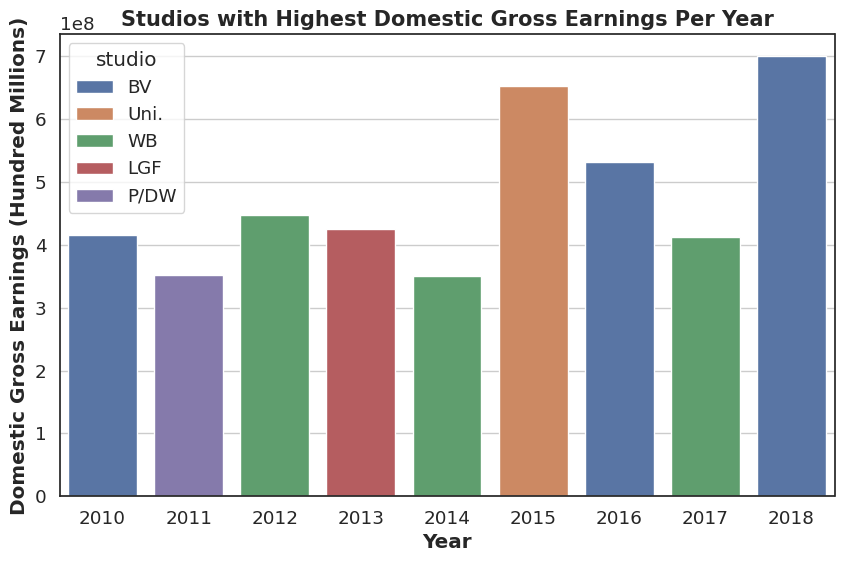

In [130]:
# Plot the studios with the highest domestic gross earnings for each year
plt.figure(figsize=(10,6))
sns.set_style('white')
sns.barplot(x='year', y='domestic_gross', hue='studio', data=studio_dom_earnings_per_year, dodge=False)
plt.title("Studios with Highest Domestic Gross Earnings Per Year", fontsize=15, fontweight='bold')
plt.ylabel("Domestic Gross Earnings (Hundred Millions)", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.grid(axis='y')

plt.show()

In [127]:
# Find the studio with the highest foreign_gross earnings each year
# Group by 'year' and find the index of the maximum foreign gross earnings for each year
max_for_studio_indices = final_merged_df.groupby('year')['foreign_gross'].idxmax()

# Select the studios with the highest foreign gross earnings for each year
studio_for_earnings_per_year = final_merged_df.loc[max_for_studio_indices, ['year', 'studio', 'foreign_gross']]\
                                .sort_values(by='foreign_gross', ascending=False)

studio_for_earnings_per_year

,year,studio,foreign_gross
830,2015,BV,946400000.0
1201,2018,Uni.,891800000.0
90,2013,BV,875700000.0
715,2014,Par.,858600000.0
191,2011,BV,804600000.0
403,2012,Sony,804200000.0
1133,2017,Uni.,770200000.0
971,2016,BV,745200000.0
3,2010,BV,652000000.0


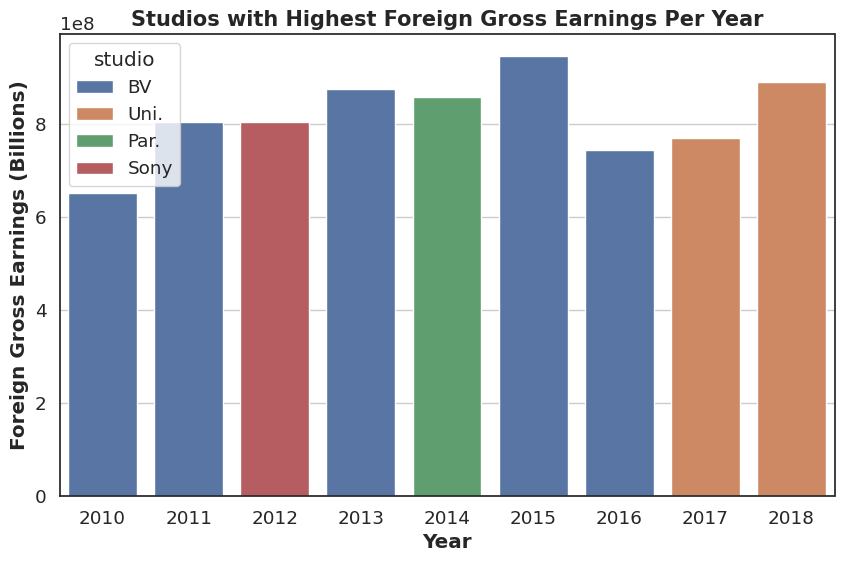

In [128]:
# Plot the studios with the highest foreign gross earnings for each year
plt.figure(figsize=(10,6))
sns.set_style('white')
sns.barplot(x='year', y='foreign_gross', hue='studio', data=studio_for_earnings_per_year, dodge=False)
plt.title("Studios with Highest Foreign Gross Earnings Per Year", fontsize=15, fontweight='bold')
plt.ylabel("Foreign Gross Earnings (Billions)", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.grid(axis='y')

plt.show()

In [124]:
# Find the studio with the highest worldwide_gross earnings each year
# Group by 'year' and find the index of the maximum worldwide gross earnings for each year
max_ww_studio_indices = final_merged_df.groupby('year')['worldwide_gross'].idxmax()

# Select the studios with the highest worldwide gross earnings for each year
studio_ww_earnings_per_year = final_merged_df.loc[max_ww_studio_indices, ['year', 'studio', 'worldwide_gross']]\
                                .sort_values(by='worldwide_gross', ascending=False)

studio_ww_earnings_per_year

,year,studio,worldwide_gross
1191,2018,BV,2048134200
843,2015,Uni.,1648854864
90,2013,BV,1272469910
1105,2017,Uni.,1234846267
971,2016,BV,1140069413
357,2011,P/DW,1123790543
403,2012,Sony,1110526981
715,2014,Par.,1104039076
3,2010,BV,1068879522


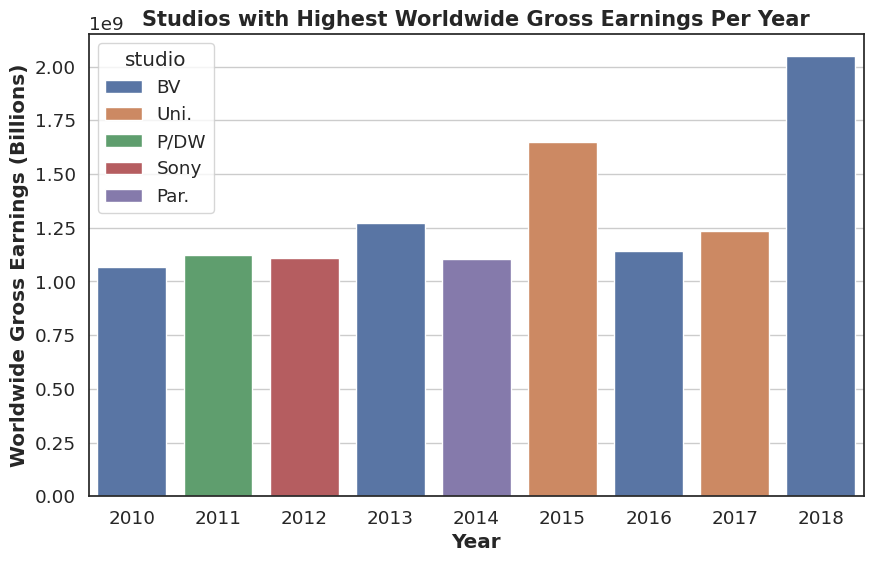

In [125]:
# Plot the studios with the highest worldwide gross earnings for each year
plt.figure(figsize=(10,6))
sns.set_style('white')
sns.barplot(x='year', y='worldwide_gross', hue='studio', data=studio_ww_earnings_per_year, dodge=False)
plt.title("Studios with Highest Worldwide Gross Earnings Per Year", fontsize=15, fontweight='bold')
plt.ylabel("Worldwide Gross Earnings (Billions)", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.grid(axis='y')

plt.show()

## Studios: Distribution of Earnings

The order of the top 10 studios in worldwide earnings follows that of the highest-earning studios domestically. Walt Disney (BV) is consistently the highest earner in all markets. Domestically, Universal Studios is the second highest-earning studio but sits third in the foreign market. The inverse is true for Fox who sits second in earnings overseas but third domestically.

All studios in the top 10 earned above USD 1 billion.

In [157]:
earnings_df_filtered = final_merged_df.copy(deep=True)
earnings_df_filtered.drop_duplicates(subset='title',
                     keep=False, inplace=True)

In [158]:
# Find the highest domestic earning studios
studio_dom_earnings = earnings_df_filtered.groupby('studio')['domestic_gross'].sum().reset_index()\
        .sort_values(by='domestic_gross', ascending=False)

studio_dom_earnings

,studio,domestic_gross
14,BV,1.088350e+10
77,Uni.,9.960338e+09
29,Fox,9.025100e+09
82,WB,8.095700e+09
70,Sony,6.332800e+09
...,...,...
73,TFA,3.229900e+04
5,Alc,1.750000e+04
56,P4,8.500000e+03
10,BBC,7.500000e+03


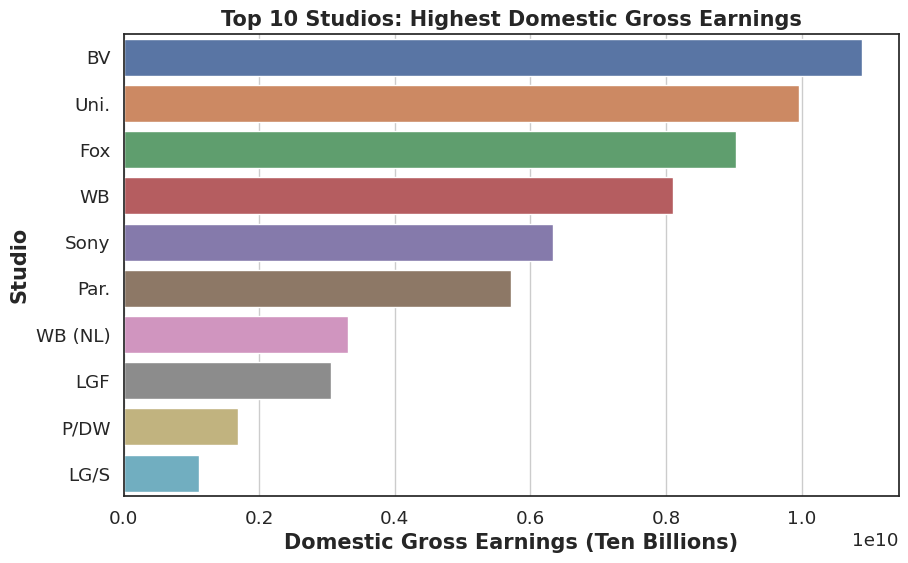

In [159]:
# Plot the top 10 studios with the highest domestic earnings
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.barplot(x='domestic_gross', y='studio', data=studio_dom_earnings.head(10))
plt.title('Top 10 Studios: Highest Domestic Gross Earnings', fontsize=15, fontweight='bold')
plt.xlabel('Domestic Gross Earnings (Ten Billions)', fontsize=15, fontweight='bold')
plt.ylabel('Studio', fontsize=15, fontweight='bold')
plt.grid(axis='x')

plt.show()

In [160]:
# Find the highest foreign earning studios
studio_foreign_earnings= earnings_df_filtered.groupby('studio')['foreign_gross'].sum().reset_index()\
                            .sort_values(by='foreign_gross', ascending=False)

studio_foreign_earnings

,studio,foreign_gross
29,Fox,1.702373e+10
14,BV,1.629304e+10
77,Uni.,1.259867e+10
82,WB,1.218978e+10
70,Sony,9.667100e+09
...,...,...
18,Cleopatra,0.000000e+00
10,BBC,0.000000e+00
69,Saban,0.000000e+00
17,CJ,0.000000e+00


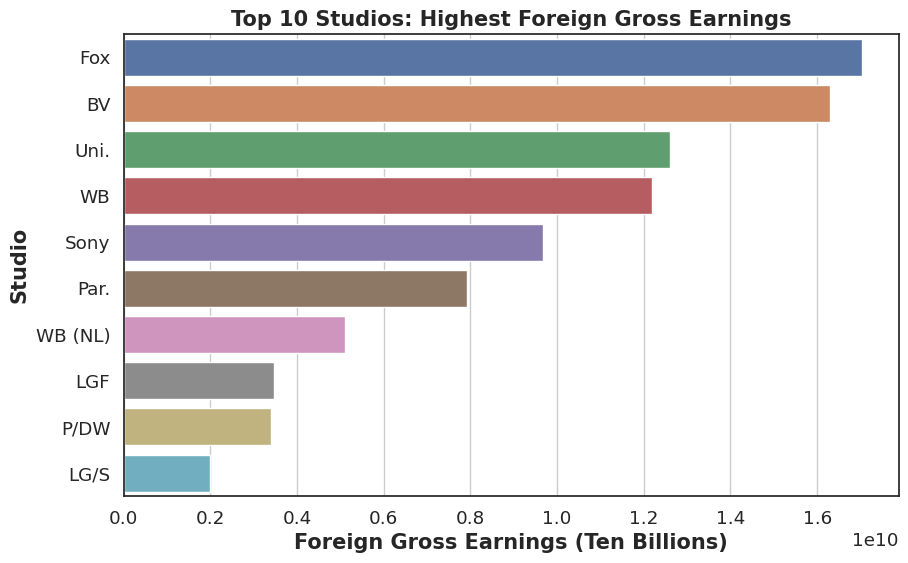

In [161]:
# Plot the top 10 studios with the highest foreign earnings
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.barplot(x='foreign_gross', y='studio', data=studio_foreign_earnings.head(10))
plt.title('Top 10 Studios: Highest Foreign Gross Earnings', fontsize=15, fontweight='bold')
plt.xlabel('Foreign Gross Earnings (Ten Billions)', fontsize=15, fontweight='bold')
plt.ylabel('Studio', fontsize=15, fontweight='bold')
plt.grid(axis='x')

plt.show()

In [162]:
# Find the highest worldwide earning studios
studio_ww_earnings= earnings_df_filtered.groupby('studio')['worldwide_gross'].sum().reset_index()\
                            .sort_values(by='worldwide_gross', ascending=False)

studio_ww_earnings.head(10)

,studio,worldwide_gross
14,BV,28425191937
29,Fox,25955497683
77,Uni.,25793486598
82,WB,20215015775
70,Sony,16097425939
59,Par.,13523291721
83,WB (NL),8361531561
41,LGF,6572482511
55,P/DW,5078027601
40,LG/S,3031840907


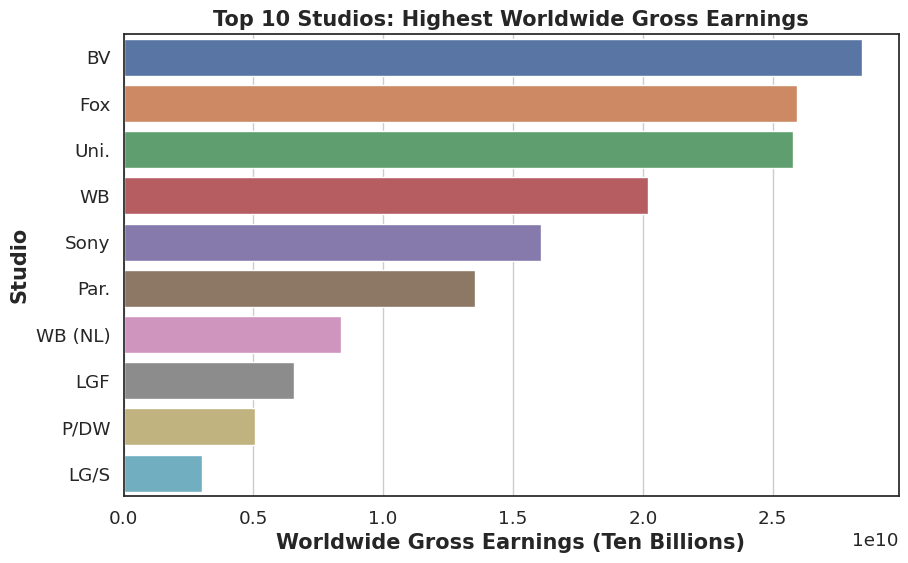

In [163]:
# Plot the top 10 studios with the highest worldwide earnings
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.barplot(x='worldwide_gross', y='studio', data=studio_ww_earnings.head(10))
plt.title('Top 10 Studios: Highest Worldwide Gross Earnings', fontsize=15, fontweight='bold')
plt.xlabel('Worldwide Gross Earnings (Ten Billions)', fontsize=15, fontweight='bold')
plt.ylabel('Studio', fontsize=15, fontweight='bold')
plt.grid(axis='x')

plt.show()

In [164]:
#Find the top 20 studios with the highest gross_profit
total_profit_per_studio = earnings_df_filtered.groupby('studio')['gross_profit'].sum()
top20_studios_profit = total_profit_per_studio.nlargest(10).reset_index()

top20_studios_profit

,studio,gross_profit
0,BV,19870391937
1,Uni.,19696286598
2,Fox,18601497683
3,WB,12760015775
4,Sony,11532925939
5,Par.,9076291721
6,WB (NL),6271931561
7,LGF,4619094861
8,P/DW,3744027601
9,Wein.,1787662208


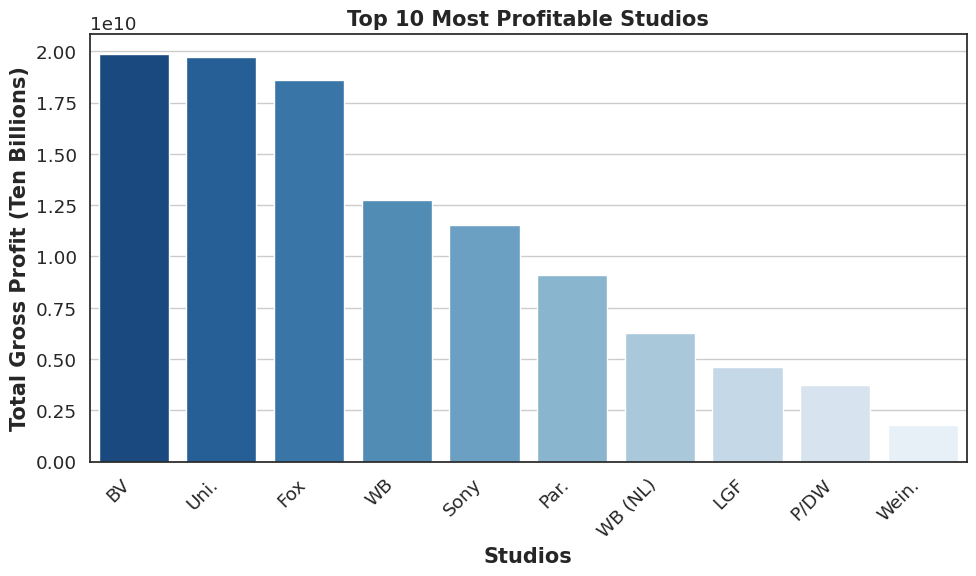

In [165]:
# Plot the top 10 profitable studios
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.barplot(x='studio', y='gross_profit', data=top20_studios_profit, palette='Blues_r')
plt.xlabel('Studios', fontsize=15, fontweight='bold')
plt.ylabel('Total Gross Profit (Ten Billions)', fontsize=15, fontweight='bold')
plt.title('Top 10 Most Profitable Studios', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

## Studios: Top 20 Most Profitable Releases

Out of the top 20 gross worldwide earning movies, 17 are the most proitable. 65% of the most profitable movies are sequels.

In [166]:
# Find the top 10 highest earning movies worldwide per studio
top20_worldwide_earners = earnings_df_filtered.nlargest(20, "worldwide_gross")\
        [["title", "worldwide_gross", "studio"]]
top20_worldwide_earners.head(20)

,title,worldwide_gross,studio
1191,Avengers: Infinity War,2048134200,BV
843,Jurassic World,1648854864,Uni.
846,Furious 7,1518722794,Uni.
830,Avengers: Age of Ultron,1403013963,BV
1201,Jurassic World: Fallen Kingdom,1305772799,Uni.
1199,Incredibles 2,1242520711,BV
1105,The Fate of the Furious,1234846267,Uni.
545,Iron Man 3,1215392272,BV
919,Minions,1160336173,Uni.
1197,Aquaman,1146894640,WB


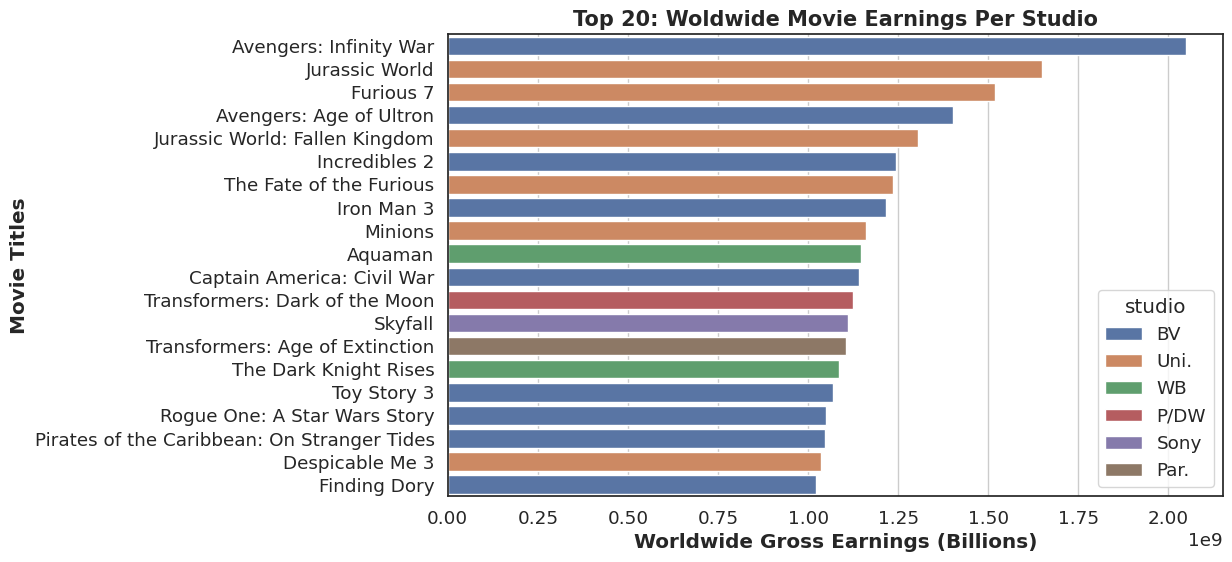

In [167]:
# Plot the top 20 highest earning movies worldwide per studio
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.barplot(x="worldwide_gross", y="title", orient="h", data=top20_worldwide_earners, hue="studio",
           dodge=False)
plt.title("Top 20: Woldwide Movie Earnings Per Studio", fontsize=15, fontweight='bold')
plt.xlabel("Worldwide Gross Earnings (Billions)", fontweight='bold')
plt.ylabel("Movie Titles", fontweight='bold')
plt.grid(axis='x')

plt.show()

In [168]:
# Display the studios with the top 20 most profitable movie releases
top20_profitable_movies = earnings_df_filtered.nlargest(20, "gross_profit")
top20_profitable_movies[['title', 'gross_profit', 'studio']]

,title,gross_profit,studio
1191,Avengers: Infinity War,1748134200,BV
843,Jurassic World,1433854864,Uni.
846,Furious 7,1328722794,Uni.
1201,Jurassic World: Fallen Kingdom,1135772799,Uni.
919,Minions,1086336173,Uni.
830,Avengers: Age of Ultron,1072413963,BV
1199,Incredibles 2,1042520711,BV
545,Iron Man 3,1015392272,BV
1197,Aquaman,986894640,WB
1105,The Fate of the Furious,984846267,Uni.


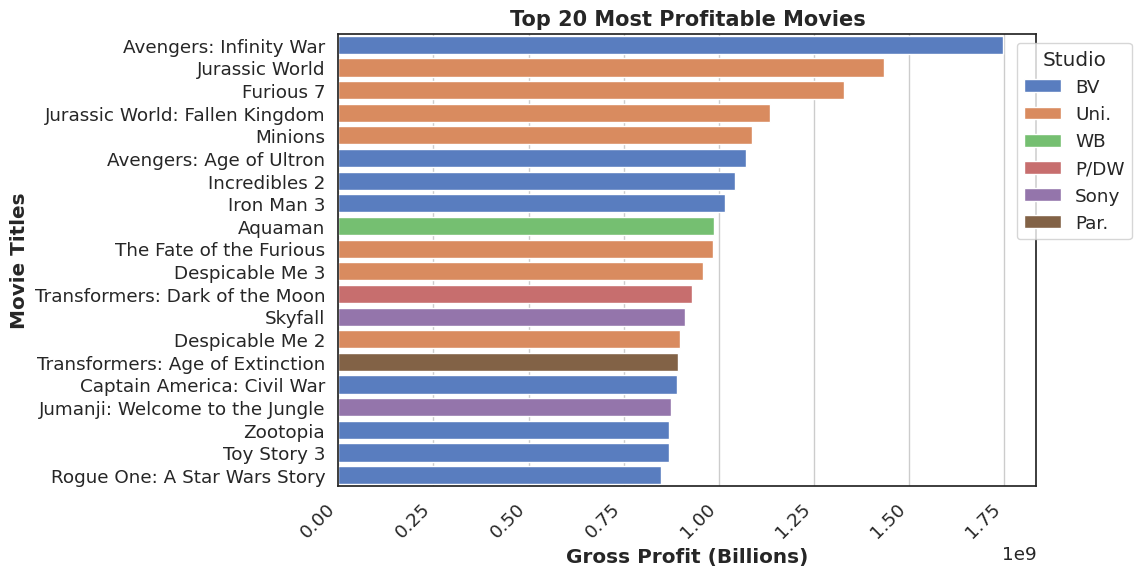

In [169]:
# Plot the top 10 most profitable movies
plt.figure(figsize=(12, 6))
sns.set_style('white')
sns.barplot(x='gross_profit', y='title', orient='h', hue='studio', data=top20_profitable_movies, palette='muted', dodge=False)
plt.xlabel('Gross Profit (Billions)', fontweight='bold')
plt.ylabel('Movie Titles', fontweight='bold')
plt.title('Top 20 Most Profitable Movies', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Studio', loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.grid(axis='x')

plt.show()

In [170]:
# Find the number of movies both in top20_worldwide_earners and top20_profitable_movies
common_movies = pd.merge(top20_worldwide_earners, top20_profitable_movies, on='title')
num_common_movies = len(common_movies)

print("Number of movies in both top20_worldwide_earners and top_20_profitable_movies:", num_common_movies)

Number of movies in both top20_worldwide_earners and top_20_profitable_movies: 17


## Production Budget: Average Budget per Studio

On average Paramount DreamWorks (P/DW) allocated the highest budget towards their projects. While they have not been the top highest-earning or most profitable studio they have been consistently in the top 10.

Walt Disney, the highest and most profitable studio within the period on average allocates the second highest budget towards its projects, followed thereon by WB and Fox who have also consistently been among the highest earners and the most profitable.

In [172]:
# Average production budget per studio

# Group by 'studio' and calculate the average production budget
avg_prod_budget_per_studio = earnings_df_filtered.groupby('studio')['production_budget'].mean().reset_index()\
                            .sort_values(by='production_budget', ascending=False)

# Rename the column for clarity
avg_prod_budget_per_studio.columns = ['studio', 'average_production_budget']

avg_prod_budget_per_studio.head(20)

,studio,average_production_budget
55,P/DW,1.334000e+08
14,BV,1.296182e+08
82,WB,8.770588e+07
29,Fox,7.139806e+07
70,Sony,7.022308e+07
59,Par.,6.444928e+07
83,WB (NL),5.970286e+07
77,Uni.,5.806857e+07
40,LG/S,5.518000e+07
43,MBox,4.630000e+07


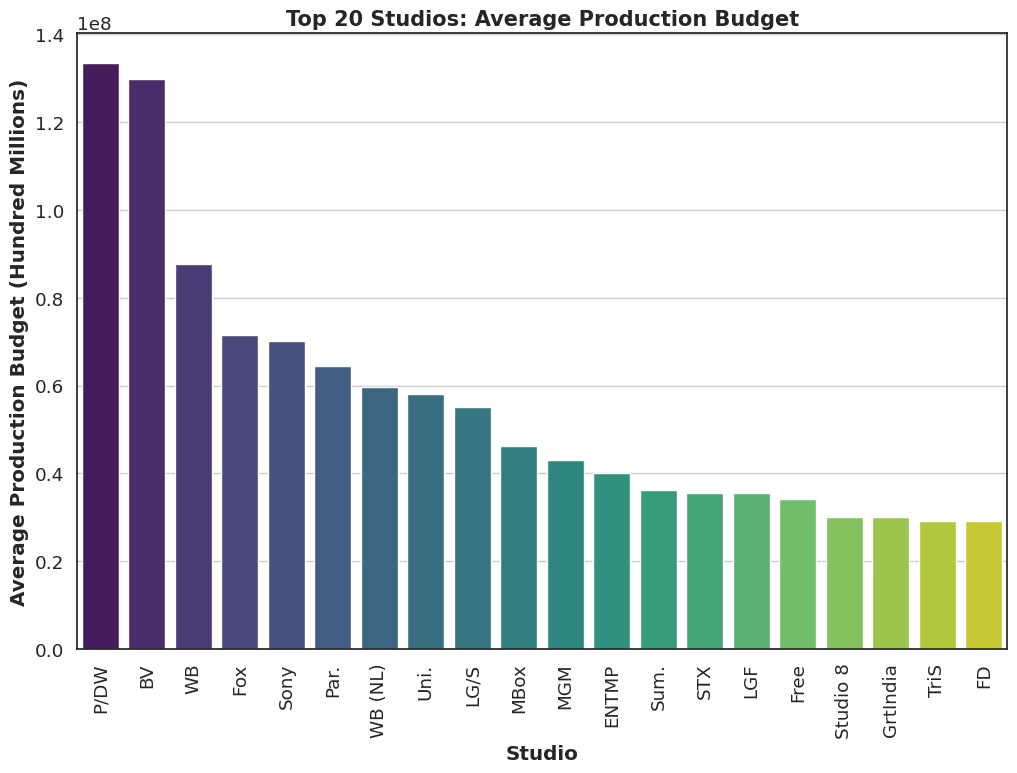

In [173]:
# Plot average production budget per year
plt.figure(figsize=(12, 8))
sns.set_style('white')
sns.barplot(data=avg_prod_budget_per_studio.head(20), x='studio', y='average_production_budget', palette='viridis')
plt.xlabel('Studio', fontweight='bold')
plt.ylabel('Average Production Budget (Hundred Millions)', fontweight='bold')
plt.title('Top 20 Studios: Average Production Budget', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

## Production Budget: Top 20 Studios with the Highest Budgets

Walt Disney, being the highest-earning studio and the most profitable is also the studio with the highest budget. We observe that the top 20 most profitable studios are also the same top 2 studios with the highest budget in the same order.

In [175]:
#Find the studios with the highest production budgets
studio_prod_budgets = earnings_df_filtered.groupby('studio')['production_budget'].sum()
top20_studios_budgets = studio_prod_budgets.nlargest(20).reset_index()

top20_studios_budgets

,studio,production_budget
0,BV,8554800000
1,WB,7455000000
2,Fox,7354000000
3,Uni.,6097200000
4,Sony,4564500000
5,Par.,4447000000
6,WB (NL),2089600000
7,LGF,1953387650
8,LG/S,1379500000
9,P/DW,1334000000


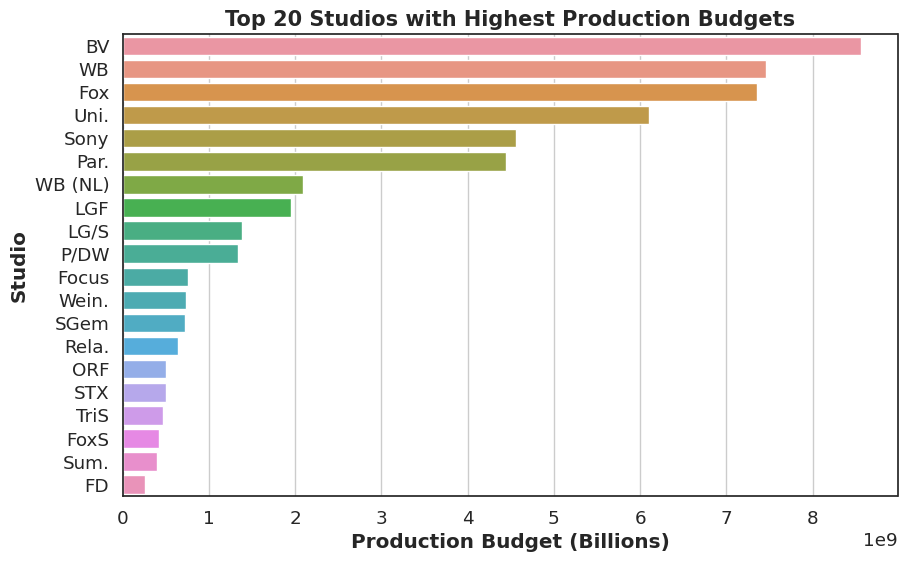

In [176]:
# Plot the top 10 studios with the highest production budgets
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.barplot(x='production_budget', y='studio', data=top20_studios_budgets)
plt.title('Top 20 Studios with Highest Production Budgets', fontsize=15, fontweight='bold')
plt.xlabel('Production Budget (Billions)', fontweight='bold')
plt.ylabel('Studio', fontweight='bold')
plt.grid(axis='x')

plt.show()

In [177]:
# Check find the number of studios in with the highest profit which are also the most profitable
common_studios = pd.merge(top20_studios_budgets, top20_studios_profit, on='studio')
num_common_studios = len(common_studios)

print("Number of studios in top20_studios_budgets that are also in top20_studios_profit:", num_common_studios)

Number of studios in top20_studios_budgets that are also in top20_studios_profit: 10


## Production Budget: Movies with the Largest Budget


Only 4 of the movies with the highest production budget are among the top 20 most profitable movies out of which 3 are produced by Walt Disney and the other by Universal Studios.

From the top 20 movies with the largest production budgets, Walt Disney's movies make up 45%, followed thereafter by Warner Bros. productions at 20%, Warner Bros. Netherlands at 15% and the other spots occupied by Sony and Universal Studio's movies.

In [178]:
# Get the top 10 movies with the largest production budgets
movies_largest_budget = earnings_df_filtered.nlargest(20, 'production_budget')\
                        [["title", "production_budget", "studio"]]

movies_largest_budget.head()

,title,production_budget,studio
191,Pirates of the Caribbean: On Stranger Tides,410600000,BV
830,Avengers: Age of Ultron,330600000,BV
832,Spectre,300000000,Sony
1103,Justice League,300000000,WB
1191,Avengers: Infinity War,300000000,BV


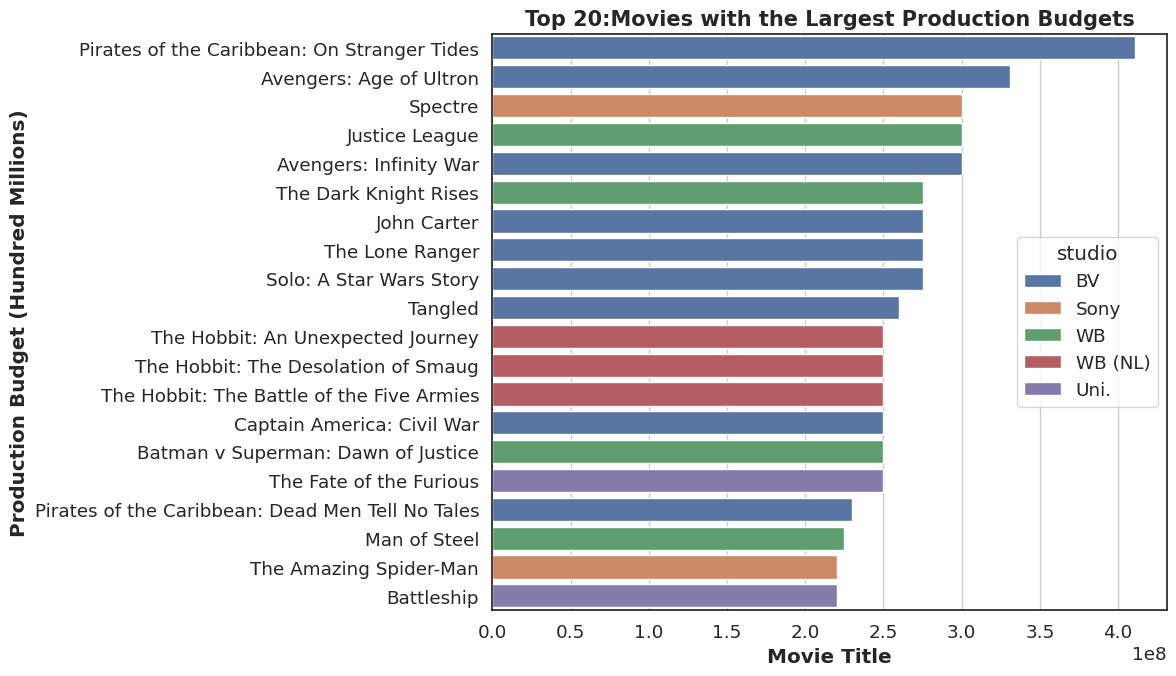

In [179]:
# Plot the top 20 movies with the largest production budgets
plt.figure(figsize=(12, 7))
sns.set_style('white')
sns.barplot(data=movies_largest_budget, x='production_budget', y='title', orient='h', hue='studio', dodge=False)
plt.xlabel('Movie Title', fontweight='bold')
plt.ylabel('Production Budget (Hundred Millions)', fontweight='bold')
plt.title('Top 20:Movies with the Largest Production Budgets', fontsize=15, fontweight='bold')
plt.grid(axis='x')
plt.tight_layout()

plt.show()

In [180]:
# Check if movies_largest_budget titles are in top20_profitable_movies
common_movies2 = movies_largest_budget[movies_largest_budget['title'].isin(top20_profitable_movies['title'])]

common_movies2[['title', 'production_budget', 'studio']]

,title,production_budget,studio
830,Avengers: Age of Ultron,330600000,BV
1191,Avengers: Infinity War,300000000,BV
971,Captain America: Civil War,250000000,BV
1105,The Fate of the Furious,250000000,Uni.


## Gross Profit & Production Budget

The data infers that the average gross profit earned increases within budget.

We observe that movies in the low-budget category have brought in the lowest aggregate gross profit, followed thereon by the medium and high-budget categories. The high-budget category on average has earned over 3 times the gross profit that the low-budget category has earned.

The very high budget category far surpasses the rest in earnings as movies within this category on average bring in over USD 22.5 million above the high budget category. Over and above the budget various other factors would result in such blockbuster films earning enormous profits which include the storyline, actors, and marketing, among others.


In [182]:
# Categorize the movies into budget categories
production_budget_quantiles = earnings_df_filtered['production_budget'].quantile([0.25, 0.5, 0.75])
low_budget = production_budget_quantiles[0.25]
medium_budget = production_budget_quantiles[0.5]
high_budget = production_budget_quantiles[0.75]


# Group the data by budget category
budget_category = pd.cut(earnings_df_filtered['production_budget'],
                         bins=[0, low_budget, medium_budget, high_budget, float('inf')],
                         labels=['Low Budget', 'Medium Budget', 'High Budget', 'Very High Budget'])

# Calculate the average gross profit for each budget category
average_gross_profit_by_budget = earnings_df_filtered.groupby(budget_category)['gross_profit'].mean().reset_index()

average_gross_profit_by_budget

,production_budget,gross_profit
0,Low Budget,2.150830e+07
1,Medium Budget,4.363772e+07
2,High Budget,7.850167e+07
3,Very High Budget,3.010253e+08


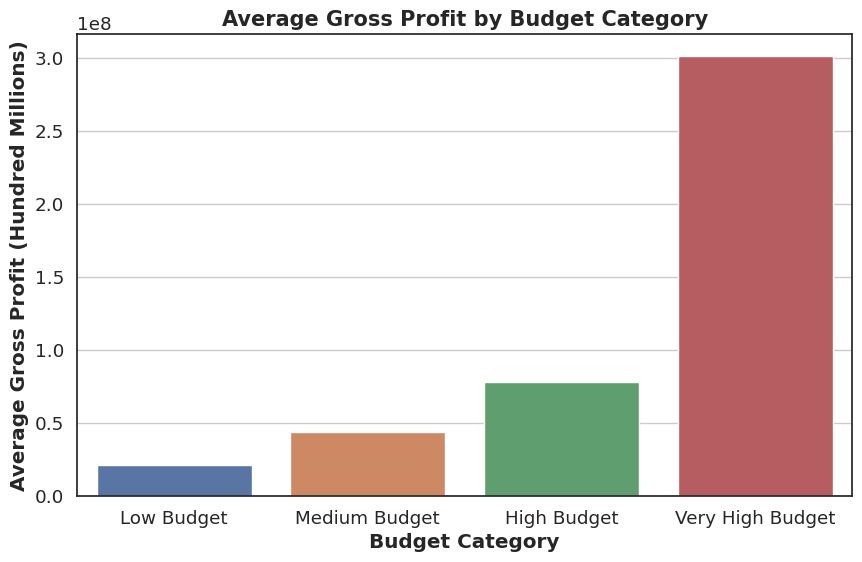

In [183]:
# Plot the average gross profit for each budget category
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.barplot(x='production_budget', y='gross_profit', data=average_gross_profit_by_budget)
plt.xlabel('Budget Category', fontweight='bold')
plt.ylabel('Average Gross Profit (Hundred Millions)', fontweight='bold')
plt.title('Average Gross Profit by Budget Category', fontsize=15, fontweight='bold')
plt.grid(axis='y')

plt.show()

## Analyzing Sequels

### Define the Function to Find Similar Movie Titles

In [197]:
# Define the function to find similar movie titles
def find_similar_movies(title, all_titles):
    similar_movies = process.extract(title, all_titles, limit=5)
    return [movie[0] for movie in similar_movies]

In [201]:
title_to_search = 'Trek'
all_movie_titles = earnings_df_filtered['title'].unique()

similar_movies = find_similar_movies(title_to_search, all_movie_titles)
print(similar_movies)

['Star Trek Into Darkness', 'Star Trek Beyond', 'Spectre', 'Shrek Forever After', 'True Grit']


### Comparing the Gross Profit

All sequel releases are very profitable and are a great way for studios to earn profits by further developing existing productions. The performance between earlier and later releases varies from movie to movie. The contributors to why this may be difficult to determine from the data available but may be attributable to the success of the preceding movie, script, and marketing.

In [199]:
# Create a list of movie titles and dataframes for each movie
movies_data = {
    'Avengers': earnings_df_filtered[earnings_df_filtered['title'].isin(['Avengers: Age of Ultron', 'Avengers: Infinity War'])],
    'Jurassic World': earnings_df_filtered[earnings_df_filtered['title'].isin(['Jurassic World', 'Jurassic World: Fallen Kingdom'])],
    'Fast & Furious': earnings_df_filtered[earnings_df_filtered['title'].isin(['Furious 7', 'The Fate of the Furious', 'Fast Five'])],
    'Iron Man': earnings_df_filtered[earnings_df_filtered['title'].isin(['Iron Man 2', 'Iron Man 3'])],
    'Despicable Me': earnings_df_filtered[earnings_df_filtered['title'].isin(['Despicable Me', 'Despicable Me 2', 'Despicable Me 3'])],
    'Transformers': earnings_df_filtered[earnings_df_filtered['title'].isin(['Transformers: Dark of the Moon', 'Transformers: Age of Extinction', 'Transformers: The Last Knight'])],
    'Captain America': earnings_df_filtered[earnings_df_filtered['title'].isin(['Captain America: The First Avenger', 'Captain America: The Winter Soldier', 'Captain America: Civil War'])],
    'Star Wars': earnings_df_filtered[earnings_df_filtered['title'].isin(['Rogue One: A Star Wars Story', 'Solo: A Star Wars Story'])],
    'Pirates of the Caribbean': earnings_df_filtered[earnings_df_filtered['title'].isin(['Pirates of the Caribbean: On Stranger Tides', 'Pirates of the Caribbean: Dead Men Tell No Tales'])]
}

# Concatenate all movie data into a single dataframe
all_movies_data = pd.concat(movies_data.values(), ignore_index=True)

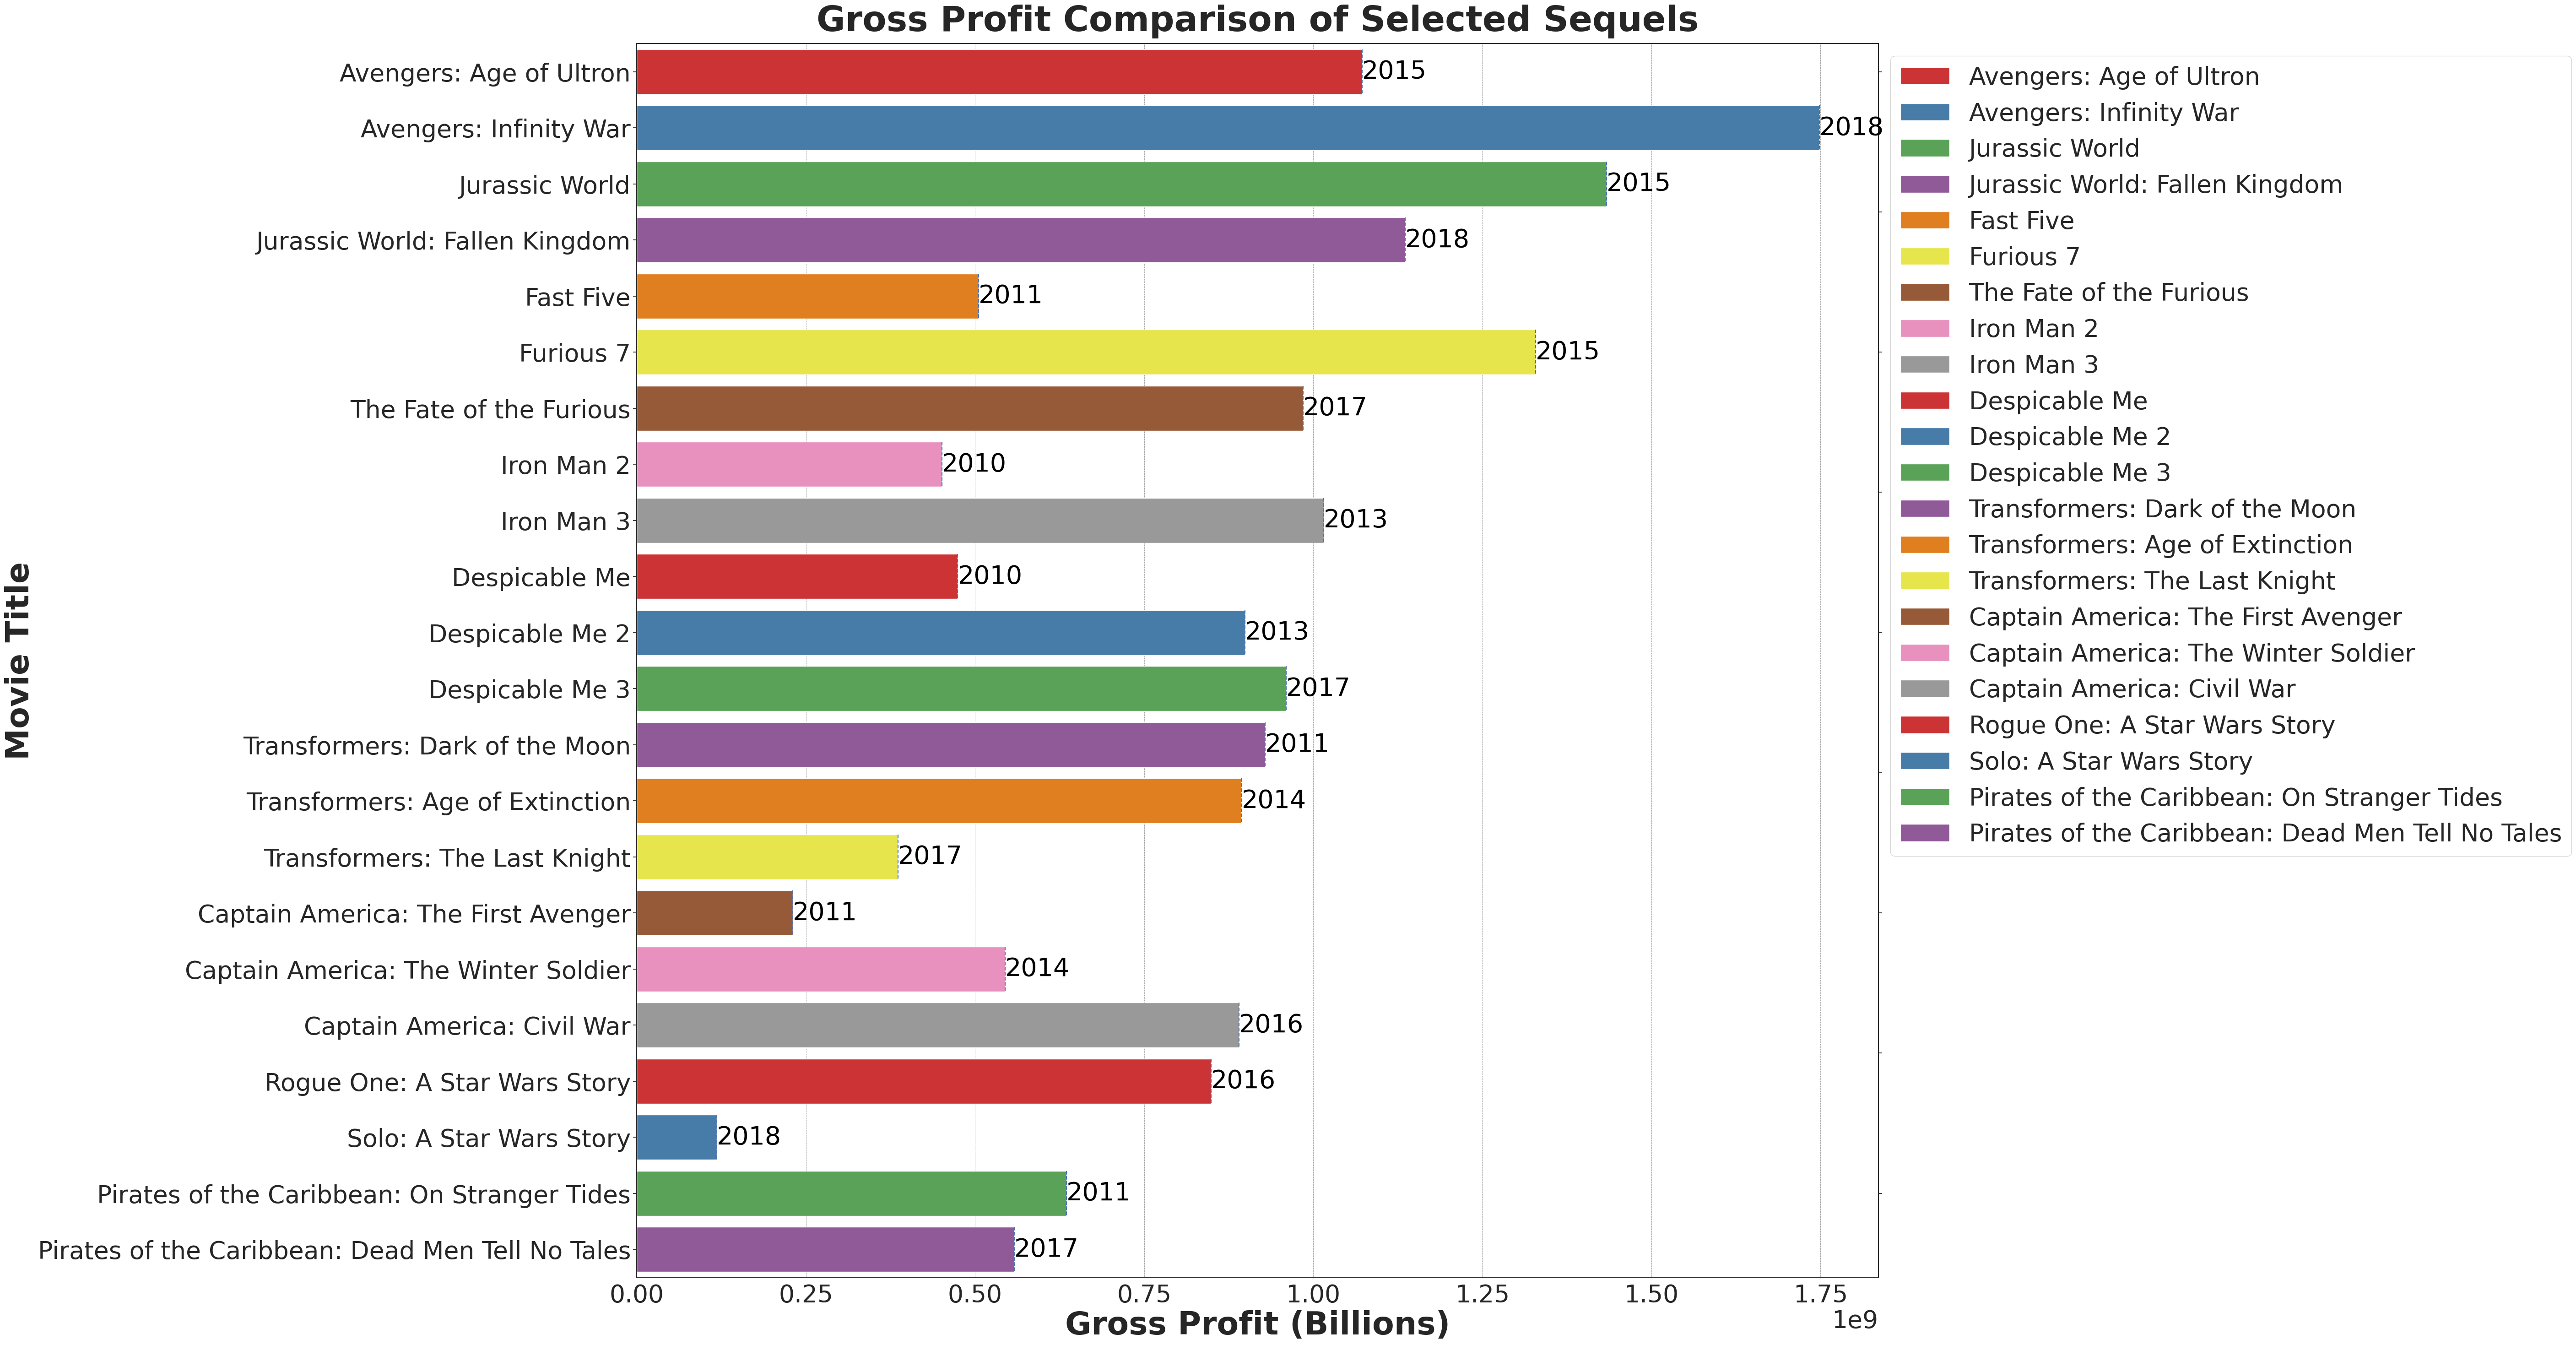

In [200]:
# Plot the gross profit earned for the selected movies
sns.set(font_scale=3.5)
sns.set_style('white')
plt.figure(figsize=(35, 35))

ax = sns.barplot(x='gross_profit', y='title', data=all_movies_data, orient='h', hue='title', palette='Set1', dodge=False)
plt.xlabel('Gross Profit (Billions)', fontsize=50, fontweight='bold')
plt.ylabel('Movie Title', fontsize=50, fontweight='bold')
plt.title('Gross Profit Comparison of Selected Sequels', fontsize=55, fontweight='bold', pad=20)
plt.grid(axis='x', color='grey', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax2 = ax.twinx()

for idx, movie_data in all_movies_data.iterrows():
    release_year = movie_data['year']
    ax2.vlines(movie_data['gross_profit'], idx - 0.4, idx + 0.4, linestyle='--')
    ax2.text(movie_data['gross_profit'], idx, str(release_year), va='center', ha='left', color='black', fontsize=40)

ax2.set_ylim(ax.get_ylim())

ax2.set_yticklabels([])

plt.show()

## Conclusions

The movie industry is highly lucrative, earning the major studios hundreds of millions of dollars in profit. Despite the downward trend in the number of movie releases, the future of the industry remains promising as earnings continue to skyrocket.

The industry is currently dominated by 10 major studios whose movies are consistently among the highest-earning and most profitable. A portion of the success of these studios can be attributed to their ability to turn already existing material such as previous movies, comic books and Booka into franchise films as well as make multiple sequels from their original creations enabling them to squeeze every last drop in earnings from those storylines.

The leading studios in the industry have done their homework, majorly focusing their productions of the most lucrative genres, Action, Adventure, Sci-Fi, Animation, and Comedy - a recipe for success. Additionally putting major focus on sequels and franchise productions enabling to capitalize on the development of one storyline and character development to keep movie goers in their seats.

The international market is critical for the success of any major film studio and thus must not be neglected.

The impact of the Covid-19 pandemic through 2020 and 2021 was that numerous films have had their theatrical releases canceled worldwide, resulting in an alternative announcement pattern with delayed releases. In the US film industry, more than 155 films were delayed to 2020 and produced in 2021 or 2022.

Across the world, and to varying degrees, cinemas and movie theaters were closed, festivals were cancelled or postponed, and film releases were moved to future dates or delayed indefinitely. Due to cinemas and movie theaters closing, the global box office dropped by billions of dollars, streaming saw a significant increase in popularity, and the stock of film exhibitors dropped dramatically. This in turn created openings for independent cinema productions to receive wider exposure.

## Business Recommendations

1.	Alternative investment options: It may be a feasible alternative for Microsoft to invest in one of the more successful studios in the business because it is significantly less risky and guarantees Microsoft a fair return on investment. Considering potential partnerships, marketing strategies, and distribution channels to ensure film and financial success.
2.	Create Long-Lasting Storylines: Franchise films such as comic book adaptations, sci-fi, and fantasy films have become increasingly profitable over the years and have contributed significantly to the success of other major studios.
3.	Industry and Competitor Analysis: Given the dominance of major studios like Walt Disney, Universal Studios, Warner Bros., Sony, and Fox, a thorough analysis of the industry and competitors is important. Their sustained success serves as a reminder of how difficult it is to compete in the market.
4.	International Market Focus: The success of large studios like Disney has been influenced by the international market. Success can be increased overall by considering global audiences and creating material that suits their tastes.
5. Create film genres, themes, and formats that align with market demand and audience preferences. By buying rights to popular book titles, introducing international stories, remaking great foreign films, and tapping into otherwise unexplored cultures like African, Arab, and indeginous/first people stories.
6. Audience Segmentation: Segment the movie-going audience based on demographics, psychographics, and viewing habits. Understand the unique preferences and demands of different audience segments. Explore potential synergies between Microsoft's existing customer base and film preferences.

## Recommendations for Future Analysis

1.	Demographic Trends in Film Preferences:
Explore how age, gender, and geographic location influence audience preferences for film genres, themes, and content. This analysis can help in tailoring marketing strategies and content creation.
2.	Economic Factors and Box Office Performance:
Investigate how economic indicators such as GDP, inflation, and consumer spending impact box office performance. Understanding the economic context can assist in releasing timing and pricing strategies.
3.	Influence of Awards and Critical Acclaim:
Analyze the relationship between film awards (e.g., Oscars, Cannes) and a film's box office success. Determine if critical acclaim and awards influence audience choices.
4.	Impact of Directors and Filmmakers:
Investigate how the reputation and record of directors, producers, and writers affect a film's success. Identify which filmmakers have a strong influence on box office performance.
5.	Marketing and Promotion Strategies:
Analyze the correlation between marketing budgets, promotional strategies, and a film's box office success. Determine the most effective marketing tactics.
6.	Impact of social media and Online Communities:
Examine the influence of social media platforms and online film communities on a film's success. Analyze the relationship between social media engagement and box office performance.
7.	Technology and Production Quality:
Investigate how advancements in technology, such as special effects and production quality, contribute to a film's success. Determine audience expectations regarding production value.
8.	Adoption of Sustainable Practices in Filmmaking:
Explore how the adoption of environmentally friendly and sustainable practices in film production impacts audience perception and success, especially in the era of increasing environmental awareness.
9.	Streaming Service Original Content Strategy:
Analyze the strategies employed by streaming services in creating and promoting original content. Understand how these strategies compare to traditional studio production.

